# Micro-Credit Defaulter Model

In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Variable	Definition
label:	            Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn:	            mobile number of user

aon:	            age on cellular network in days

daily_decr30:	    Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90:	    Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30: 	        Average main account balance over last 30 days

rental90:	        Average main account balance over last 90 days

last_rech_date_ma:	Number of days till last recharge of main account

last_rech_date_da:	Number of days till last recharge of data account

last_rech_amt_ma:	Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30:	    Number of times main account got recharged in last 30 days

fr_ma_rech30:  	    Frequency of main account recharged in last 30 days

sumamnt_ma_rech30:	    Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30:	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian 
Rupiah)

medianmarechprebal30:	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90:   	Number of times main account got recharged in last 90 days

fr_ma_rech90:	    Frequency of main account recharged in last 90 days

sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90:	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90:	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30:	     Number of times data account got recharged in last 30 days

fr_da_rech30:	     Frequency of data account recharged in last 30 days

cnt_da_rech90:	     Number of times data account got recharged in last 90 days

fr_da_rech90:	     Frequency of data account recharged in last 90 days

cnt_loans30: 	     Number of loans taken by user in last 30 days

amnt_loans30:	     Total amount of loans taken by user in last 30 days

maxamnt_loans30:	 maximum amount of loan taken by the user in last 30 days

medianamnt_loans30:	 Median of amounts of loan taken by the user in last 30 days

cnt_loans90:	     Number of loans taken by user in last 90 days

amnt_loans90:	     Total amount of loans taken by user in last 90 days

maxamnt_loans90:	 maximum amount of loan taken by the user in last 90 days

medianamnt_loans90:	 Median of amounts of loan taken by the user in last 90 days

payback30:	         Average payback time in days over last 30 days

payback90:	         Average payback time in days over last 90 days

pcircle:        	 telecom circle

pdate:	             date

## Loading Database

In [3]:
url = 'D:/Bhushan Sharma/Internship/Project/Data file.csv'
df = pd.read_csv(url, parse_dates = ['pdate'])
df.shape

(209593, 37)

In [4]:
pd.set_option('display.max_rows', None)  # to maximize the rows
pd.set_option('display.max_columns', None)  # to maximize the columns

In [5]:
df.head()  # top 5 rows

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
# unnamed: column is just a serial number column, better to remove
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
df.shape
# (209593, 36)

(209593, 36)

In [8]:
df.tail()  # bottom 10 rows

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


## Information about dataset

In [9]:
df.info()
# All columns are having same non-null values mean, null values are not present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  object        
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

In [10]:
df.dtypes

label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30             

## Null value checking 

In [11]:
null_value = df.isnull().sum()
null_value[null_value > 0]
# No null value present

Series([], dtype: int64)

<AxesSubplot:>

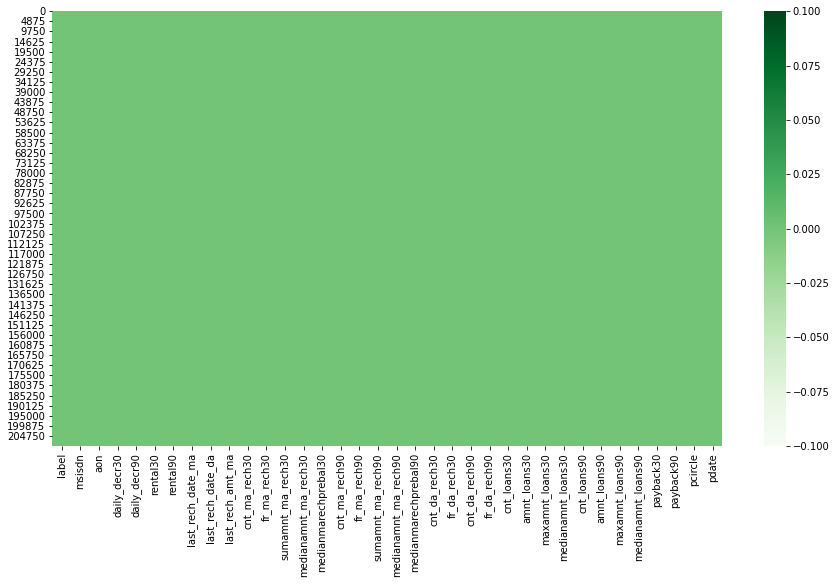

In [12]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.isnull(), cmap = 'Greens')

In [13]:
# As heatmap is clear, which indicates no null value present in the dataset

## Data Preprocessing

#### Deleting columns which are not necessary for Training the model

In [14]:
df.head(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10


In [15]:
# msisdn is mobile number for user , hence this mobile number column is in not use for building 
# ML model, therefore, it is better to remove this column from the dataset
df.shape

(209593, 36)

In [16]:
df.drop(columns = ['msisdn'], inplace = True)
df.shape

(209593, 35)

#### Extraction of relevent information from the pdate column (Day, month, year)

In [17]:

df['pdate_year'] = df['pdate'].dt.year
df['pdate_month'] = df['pdate'].dt.month
df['pdate_day'] = df['pdate'].dt.day
df.shape

(209593, 38)

In [18]:
# As relevent information have been extracted form pdate column therefore, pdate column 
# would be better to delete
df.drop(columns = 'pdate', inplace = True)
df.shape

(209593, 37)

In [19]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [20]:
numeric_col = df.select_dtypes(include = ['float64', 'int64']).keys()
numeric_col


Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate_year', 'pdate_month', 'pdate_day'],
      dtype='object')

##### Working on "cnt_ma_reach30" column

In [21]:
print(df['cnt_ma_rech30'].unique())
print(df['cnt_ma_rech30'].nunique())

[  2   1   0   7   4   3   5  15   6   9  10  11  13   8  12  16  18  19
  29  17  14  21  27  22  37  23  20  26  25  24  34  28  32  35  31  33
  40  30  41  36  52  38  48  61  39  54  84  42  44  46  45  47  49  43
  55  74  58  64  59  53  51  77  78  50  91  99 115 203  60  71  63]
71


In [22]:
df['cnt_ma_rech30'].max()

203

In [23]:
df['cnt_ma_rech30'].min()

0

In [24]:
# as we can see, this column is containing 71 unique value outof 2 lakhs rows
# therefore, it is better to convert this column into classes

In [25]:
# Loop for creating class of cnt_ma_rech30 class
cnt_ma_rech30_class = []
for i in df['cnt_ma_rech30']:
    if i in range (1, 51):
        cnt_ma_rech30_class.append('1-50 times')
    elif i in range (51, 101):
        cnt_ma_rech30_class.append('51-100 times')
    elif i in range(101,151):
        cnt_ma_rech30_class.append('101-150 times')
    elif i in range(151, 201):
        cnt_ma_rech30_class.append('151-200 times')
    elif i in range(201, 250):
        cnt_ma_rech30_class.append('200+ times')
    elif i == 0:
        cnt_ma_rech30_class.append('Zero times')
len(cnt_ma_rech30_class)

209593

In [26]:
df['new_cnt_ma_rech30'] = cnt_ma_rech30_class

In [27]:
df.shape

(209593, 38)

In [28]:
df.drop(columns = ['cnt_ma_rech30'], inplace = True )
df.shape

(209593, 37)

In [29]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times


###### Working on "last_rech_amt_ma" column¶

In [30]:
df['last_rech_amt_ma'].nunique()
print(df['last_rech_amt_ma'].unique())

[ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  1333  4067
  3467  5814  7400  7560   777 15400  1933 17391 11927  6960 21739  1554
 11327  4940 12500   790  5214 32000 11900  9400 11000  1580  4340  3466
 55000   769 11004   946  4066 19130 17467  4047   954 14783  6222   177
 19913  1546  1923 22609  7999  1538 15652   772 34783 10454]


In [31]:
df['last_rech_amt_ma'].max()

55000

In [32]:
df['last_rech_amt_ma'].min()

0

In [33]:
# Loop for creating class of tenure class
last_rech_amt_ma_class = []
for i in df['last_rech_amt_ma']:
    if i in range (1, 5001):
        last_rech_amt_ma_class.append('1-5000 Amt')
    elif i in range (5001, 10001):
        last_rech_amt_ma_class.append('5001-10000 Amt')
    elif i in range(10001,20001):
        last_rech_amt_ma_class.append('10001-20000 Amt')
    elif i in range(20001, 30001):
        last_rech_amt_ma_class.append('20001-30000 Amt')
    elif i in range(30001, 40001):
        last_rech_amt_ma_class.append('30001-40000 Amt')
    elif i in range(40001, 50001):
        last_rech_amt_ma_class.append('40001-50000 Amt')
    elif i in range(50001, 60000):
        last_rech_amt_ma_class.append('50001-60000 Amt')
    elif i == 0:
        last_rech_amt_ma_class.append('0 Amt')
len(last_rech_amt_ma_class)

209593

In [34]:
df['New_last_rech_amt_ma'] = last_rech_amt_ma_class

In [35]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times,1-5000 Amt
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times,5001-10000 Amt
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times,1-5000 Amt
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times,1-5000 Amt
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times,1-5000 Amt


In [36]:
df.shape
df.drop(columns = ['last_rech_amt_ma'], inplace = True)
df.shape

(209593, 37)

In [37]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times,1-5000 Amt
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times,5001-10000 Amt
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times,1-5000 Amt
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times,1-5000 Amt
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times,1-5000 Amt


##### Working on "cnt_ma_rech90" column

In [38]:
df['cnt_ma_rech90'].nunique()

110

In [39]:
df['cnt_ma_rech90'].unique()

array([  2,   1,   8,   9,   4,   7,   0,   3,  19,  10,   6,  20,  11,
        16,  15,   5,  18,  14,  13,  12,  34,  30,  17,  25,  26,  23,
        33,  27,  22,  70,  40,  21,  39,  24,  35,  28,  37,  31,  29,
        43,  45,  48,  63,  42,  32,  36,  46,  59,  38,  53,  57,  51,
        62,  49,  58,  41,  64,  83,  82,  67,  50,  60,  47,  90,  97,
        54,  44,  56,  73, 172,  74,  71,  78,  52, 118,  69,  68,  61,
        55,  92,  75,  80,  77,  99,  65,  79,  94,  72,  66,  93,  85,
        86, 140, 110,  84,  81, 105, 100,  98, 121, 132,  88, 127,  96,
       336, 151, 104,  91,  87, 120], dtype=int64)

In [40]:
df['cnt_ma_rech90'].min()

0

In [41]:
df['cnt_ma_rech90'].max()

336

In [42]:
# Loop for creating class of tenure class
cnt_ma_rech90_class = []
for i in df['cnt_ma_rech90']:
    if i in range (1, 51):
        cnt_ma_rech90_class.append('1-50 Amt')
    elif i in range (51, 101):
        cnt_ma_rech90_class.append('51-100 Amt')
    elif i in range(101,151):
        cnt_ma_rech90_class.append('101-150 Amt')
    elif i in range(151, 201):
        cnt_ma_rech90_class.append('151-200 Amt')
    elif i in range(201, 251):
        cnt_ma_rech90_class.append('201-250 Amt')
    elif i in range(251, 301):
        cnt_ma_rech90_class.append('251-300 Amt')
    elif i in range(300, 350):
        cnt_ma_rech90_class.append('300+ ')
    elif i == 0:
        cnt_ma_rech90_class.append('0 Amt')
len(cnt_ma_rech90_class)

209593

In [43]:
df['cnt_ma_rech90_class'] = cnt_ma_rech90_class
df.shape

(209593, 38)

In [44]:
df.shape
df.drop(columns = ['cnt_ma_rech90'], inplace = True)
df.shape

(209593, 37)

In [45]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times,1-5000 Amt,1-50 Amt
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times,5001-10000 Amt,1-50 Amt
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times,1-5000 Amt,1-50 Amt
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times,1-5000 Amt,1-50 Amt
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times,1-5000 Amt,1-50 Amt


##### Working on "fr_ma_rech90" column

In [46]:
df['fr_ma_rech90'].unique()

array([21,  0,  2,  3,  1,  5, 30, 10, 26,  8, 31, 64, 66, 12, 32, 15,  7,
       18,  4,  9, 57, 50, 67, 11,  6, 44, 41, 45, 35, 40, 33, 34, 37, 22,
       23, 17, 36, 42, 25, 20, 13, 14, 47, 46, 51, 16, 39, 48, 59, 24, 38,
       19, 55, 62, 52, 65, 29, 74, 28, 71, 54, 56, 60, 43, 49, 27, 70, 53,
       73, 78, 68, 58, 79, 69, 61, 72, 85, 77, 75, 80, 63, 86, 83, 76, 88,
       82, 84, 81, 87], dtype=int64)

In [47]:
df['fr_ma_rech90'].min()

0

In [48]:
df['fr_ma_rech90'].max()

88

In [49]:
# Loop for creating class of fr_ma_rech90 class
fr_ma_rech90_class = []
for i in df['fr_ma_rech90']:
    if i in range (0, 11):
        fr_ma_rech90_class.append('0-10 times')
    elif i in range (11, 31):
        fr_ma_rech90_class.append('11-30 times')
    elif i in range(31,51):
        fr_ma_rech90_class.append('31-50 times')
    elif i in range(51, 71):
        fr_ma_rech90_class.append('51-70 times')
    elif i in range(71, 91):
        fr_ma_rech90_class.append('71-91 times')

len(fr_ma_rech90_class)

209593

In [50]:
df['New_fr_ma_rech90'] = fr_ma_rech90_class
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times,1-5000 Amt,1-50 Amt,0-10 times
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times,1-5000 Amt,1-50 Amt,0-10 times
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times,1-5000 Amt,1-50 Amt,0-10 times


In [51]:
df.drop(columns = 'fr_ma_rech90', inplace = True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times,1-5000 Amt,1-50 Amt,0-10 times
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times,1-5000 Amt,1-50 Amt,0-10 times
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times,1-5000 Amt,1-50 Amt,0-10 times


##### Working on "fr_da_rech90" column

In [52]:
df['fr_da_rech90'].unique()

array([ 0, 16,  8,  5, 11,  4,  6, 27, 29,  3,  9, 19, 24, 57,  1, 35, 28,
       30,  7, 18, 13, 37,  2, 17, 14, 10, 12, 22, 15, 21, 42, 20, 23, 26,
       25, 34, 32, 39, 31, 33, 43, 56, 46, 41, 55, 64], dtype=int64)

In [53]:
df['fr_da_rech90'].min()

0

In [54]:
df['fr_da_rech90'].max()

64

In [55]:
# Loop for creating class of fr_da_rech90 class
fr_da_rech90_class = []
for i in df['fr_da_rech90']:
    if i in range (0, 16):
        fr_da_rech90_class.append('0-15 times')
    elif i in range (16, 31):
        fr_da_rech90_class.append('16-30 times')
    elif i in range(31,46):
        fr_da_rech90_class.append('31-45 times')
    elif i in range(46, 61):
        fr_da_rech90_class.append('46-60 times')
    elif i in range(61, 76):
        fr_da_rech90_class.append('61-75 times')

len(fr_da_rech90_class)

209593

In [56]:
df['fr_da_rech90_class'] = fr_da_rech90_class

In [57]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90,fr_da_rech90_class
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times,0-15 times
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times,0-15 times
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times


In [58]:
df.drop(columns= ['fr_da_rech90'], inplace = True)

In [59]:
df.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90,fr_da_rech90_class
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,3078,1539.0,7.50,0.0,0.0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times,0-15 times
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,5787,5787.0,61.04,0.0,0.0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times,0-15 times


##### Working on "cnt_da_rech90" column

In [60]:
df['cnt_da_rech90'].unique()

array([ 0,  1,  3,  2,  5,  6,  8,  4, 27,  7,  9, 14, 12, 22, 13, 10, 16,
       19, 11, 15, 38, 18, 20, 30, 28, 25, 17], dtype=int64)

In [61]:
df['cnt_da_rech90'].min()

0

In [62]:
df['cnt_da_rech90'].max()

38

In [63]:
# Loop for creating class of fr_da_rech90 class
cnt_da_rech90_class = []
for i in df['cnt_da_rech90']:
    if i in range (0, 11):
        cnt_da_rech90_class.append('0-10 times')
    elif i in range (11, 21):
        cnt_da_rech90_class.append('11-20 times')
    elif i in range(21,31):
        cnt_da_rech90_class.append('21-30 times')
    elif i in range(31, 41):
        cnt_da_rech90_class.append('31-40 times')

len(cnt_da_rech90_class)

209593

In [64]:
df['New_cnt_da_rech90'] = cnt_da_rech90_class

In [65]:
df.drop(columns = 'cnt_da_rech90', inplace = True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90,fr_da_rech90_class,New_cnt_da_rech90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,3078,1539.0,7.50,0.0,0.0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times,0-15 times,0-10 times
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,5787,5787.0,61.04,0.0,0.0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,1539,1539.0,66.32,0.0,0.0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,947,947.0,2.50,0.0,0.0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,23496,2888.0,35.00,0.0,0.0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times


##### Working on "cnt_loans30" column

In [66]:
df.cnt_loans30.unique()

array([ 2,  1,  7,  3,  4,  5,  8,  6, 10, 12,  0, 11,  9, 21, 17, 15, 19,
       13, 18, 25, 22, 20, 16, 14, 28, 29, 23, 33, 30, 26, 36, 31, 27, 24,
       32, 38, 41, 44, 50, 35], dtype=int64)

In [67]:
# Loop for creating class of fr_da_rech90 class
cnt_loans30_class = []
for i in df['cnt_loans30']:
    if i in range (0, 11):
        cnt_loans30_class.append('0-10 times')
    elif i in range (11, 21):
        cnt_loans30_class.append('11-20 times')
    elif i in range(21,31):
        cnt_loans30_class.append('21-30 times')
    elif i in range(31, 41):
        cnt_loans30_class.append('31-40 times')
    elif i in range(41, 51):
        cnt_loans30_class.append('41-50 times')

len(cnt_loans30_class)

209593

In [68]:
df['cnt_loans30_class'] = cnt_loans30_class

In [69]:
df.drop(columns = 'cnt_loans30', inplace  = True)


In [70]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90,fr_da_rech90_class,New_cnt_da_rech90,cnt_loans30_class
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,3078,1539.0,7.50,0.0,0.0,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times,0-15 times,0-10 times,0-10 times
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,5787,5787.0,61.04,0.0,0.0,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,1539,1539.0,66.32,0.0,0.0,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,947,947.0,2.50,0.0,0.0,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,23496,2888.0,35.00,0.0,0.0,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times


##### Working on "maxamnt_loans90" column

In [71]:
df['maxamnt_loans90'].unique()

array([ 6, 12,  0], dtype=int64)

In [72]:
# Loop for creating class of fr_da_rech90 class
maxamnt_loans90_class = []
for i in df['maxamnt_loans90']:
    if i in range (0, 11):
        maxamnt_loans90_class.append('0 amt')
    elif i in range (11, 21):
        maxamnt_loans90_class.append('6 amt')
    elif i in range(21,31):
        maxamnt_loans90_class.append('12 amt')

len(maxamnt_loans90_class)

209593

In [73]:
df['maxamnt_loans90_class'] = maxamnt_loans90_class
df.drop(columns = ['maxamnt_loans90'], inplace = True)

In [74]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_year,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90,fr_da_rech90_class,New_cnt_da_rech90,cnt_loans30_class,maxamnt_loans90_class
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,3078,1539.0,7.50,0.0,0.0,12,6.0,0.0,2.0,12,0.0,29.000000,29.000000,UPW,2016,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times,0-15 times,0-10 times,0-10 times,0 amt
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,5787,5787.0,61.04,0.0,0.0,12,12.0,0.0,1.0,12,0.0,0.000000,0.000000,UPW,2016,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,6 amt
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,1539,1539.0,66.32,0.0,0.0,6,6.0,0.0,1.0,6,0.0,0.000000,0.000000,UPW,2016,8,19,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,0 amt
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,947,947.0,2.50,0.0,0.0,12,6.0,0.0,2.0,12,0.0,0.000000,0.000000,UPW,2016,6,6,Zero times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,0 amt
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,23496,2888.0,35.00,0.0,0.0,42,6.0,0.0,7.0,42,0.0,2.333333,2.333333,UPW,2016,6,22,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,0 amt


In [75]:
df.medianamnt_loans90.unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

In [76]:
df.drop(columns = 'pdate_year', inplace = True )

In [77]:
df.shape

(209593, 36)

In [78]:
df.dtypes

label                      int64
aon                      float64
daily_decr30             float64
daily_decr90             float64
rental30                 float64
rental90                 float64
last_rech_date_ma        float64
last_rech_date_da        float64
fr_ma_rech30             float64
sumamnt_ma_rech30        float64
medianamnt_ma_rech30     float64
medianmarechprebal30     float64
sumamnt_ma_rech90          int64
medianamnt_ma_rech90     float64
medianmarechprebal90     float64
cnt_da_rech30            float64
fr_da_rech30             float64
amnt_loans30               int64
maxamnt_loans30          float64
medianamnt_loans30       float64
cnt_loans90              float64
amnt_loans90               int64
medianamnt_loans90       float64
payback30                float64
payback90                float64
pcircle                   object
pdate_month                int64
pdate_day                  int64
new_cnt_ma_rech30         object
New_last_rech_amt_ma      object
cnt_ma_rec

In [79]:
df.drop(columns = ['pcircle'], inplace = True)
df.shape

(209593, 35)

In [80]:
# df['pcircle'].unique() 
# As we can see, pcircle column is showing same value in each row therefore, it is better to remove this column

In [81]:
numeric_col = df.select_dtypes(include = ['float64', 'int64']).keys()
object_col = df.select_dtypes(include = ['object']).keys()
print(len(object_col))
print(len(numeric_col))

8
27


In [82]:
len(df.columns)   # Total no. of columns

35

## Visualization

### For Categorical columns

In [83]:
object_col
# Index(['pcircle', 'new_cnt_ma_rech30', 'New_last_rech_amt_ma',
#        'cnt_ma_rech90_class', 'New_fr_ma_rech90', 'fr_da_rech90_class',
#        'New_cnt_da_rech90', 'cnt_loans30_class', 'maxamnt_loans90_class'],
#       dtype='object')

Index(['new_cnt_ma_rech30', 'New_last_rech_amt_ma', 'cnt_ma_rech90_class',
       'New_fr_ma_rech90', 'fr_da_rech90_class', 'New_cnt_da_rech90',
       'cnt_loans30_class', 'maxamnt_loans90_class'],
      dtype='object')

In [84]:
numeric_col

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'amnt_loans30', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'pdate_month',
       'pdate_day'],
      dtype='object')

In [85]:
df.label.value_counts()

# 1    183431
# 0     26162

# Data is imbalanced need to apply some method to balance the data

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

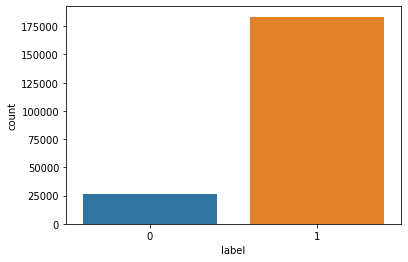

In [86]:
sns.countplot(df.label) # counplot for target variable

In [87]:
object_col
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90,fr_da_rech90_class,New_cnt_da_rech90,cnt_loans30_class,maxamnt_loans90_class
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,3078,1539.0,7.50,0.0,0.0,12,6.0,0.0,2.0,12,0.0,29.000000,29.000000,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times,0-15 times,0-10 times,0-10 times,0 amt
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,5787,5787.0,61.04,0.0,0.0,12,12.0,0.0,1.0,12,0.0,0.000000,0.000000,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,6 amt
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,1539,1539.0,66.32,0.0,0.0,6,6.0,0.0,1.0,6,0.0,0.000000,0.000000,8,19,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,0 amt
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,947,947.0,2.50,0.0,0.0,12,6.0,0.0,2.0,12,0.0,0.000000,0.000000,6,6,Zero times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,0 amt
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,23496,2888.0,35.00,0.0,0.0,42,6.0,0.0,7.0,42,0.0,2.333333,2.333333,6,22,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,0 amt


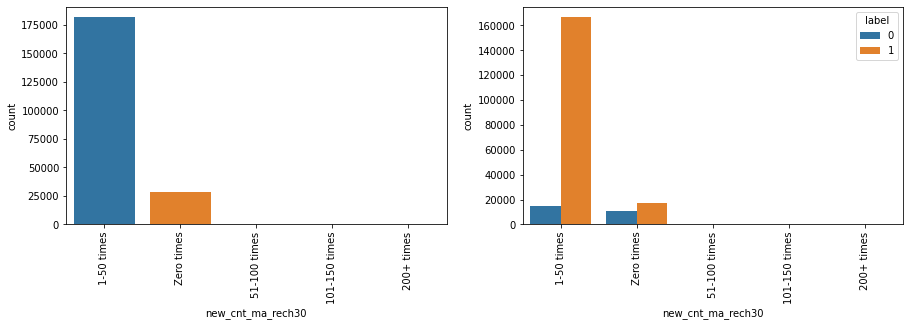

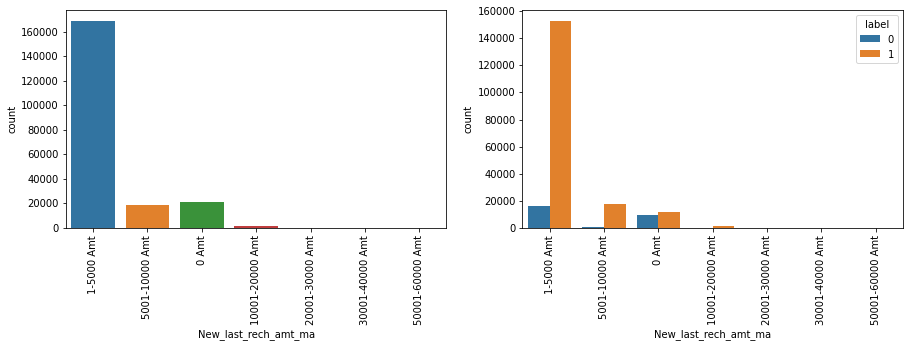

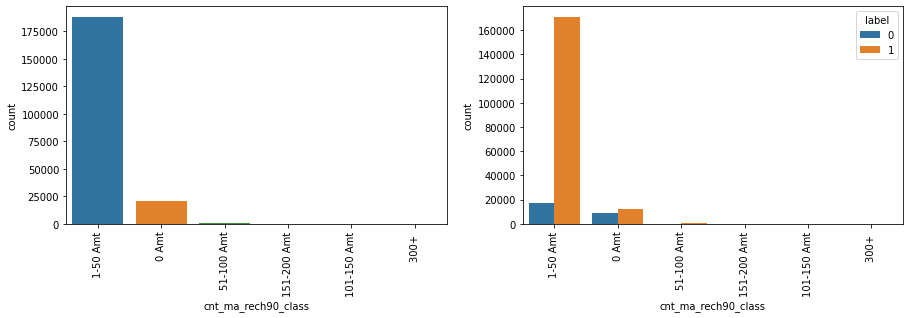

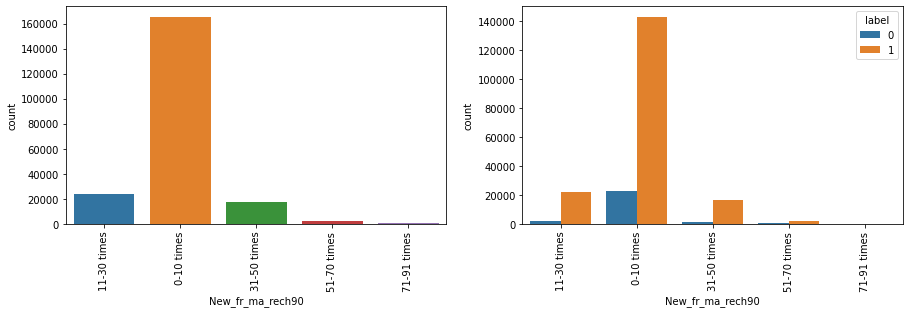

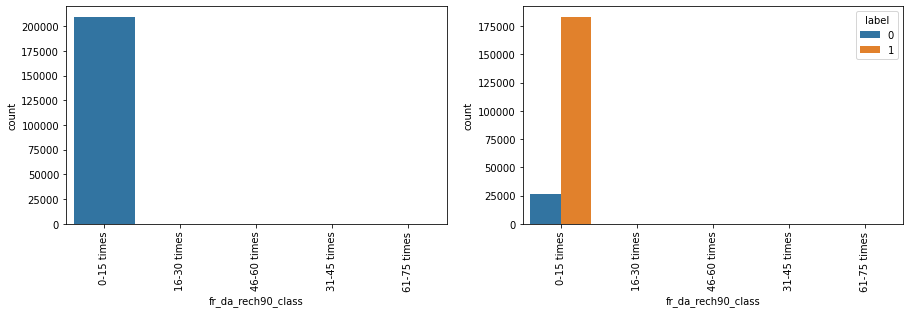

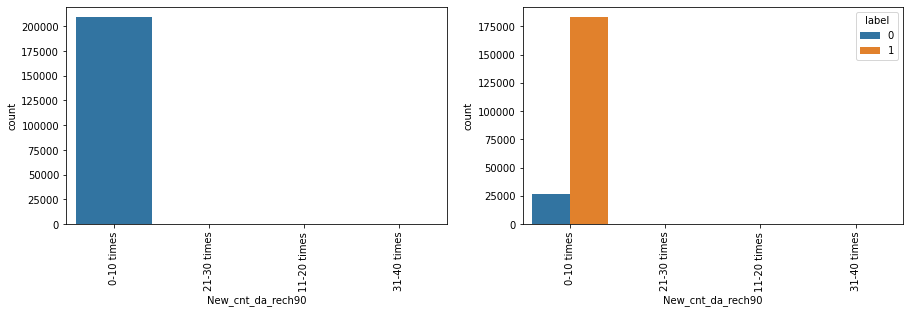

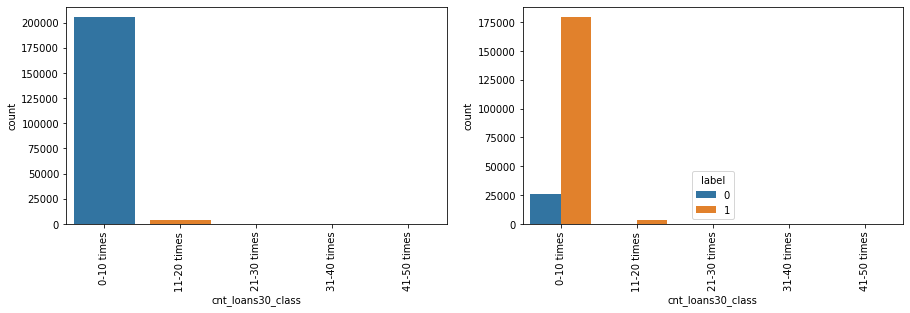

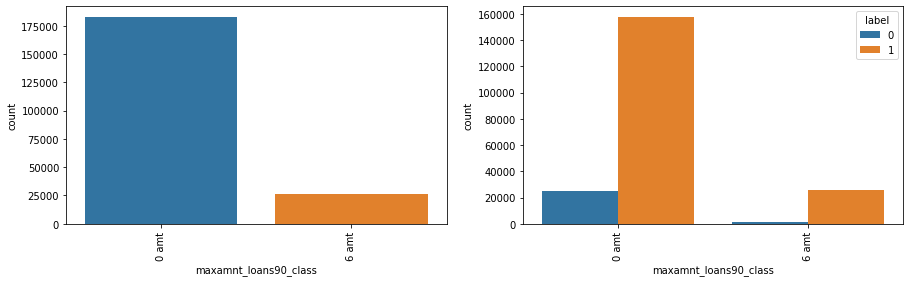

In [88]:
for i in object_col:    
    plt.figure(figsize= (15, 4))
    l = list(df[i].unique())
    plt.subplot(1,2, 1)
    bar = sns.countplot(df[i])
    bar.set_xticklabels(labels = l, rotation = 90)

    plt.subplot(1,2, 2)
    bar1 = sns.countplot(df[i], hue = df['label'])
    bar1.set_xticklabels(labels = l, rotation = 90)

    plt.show()

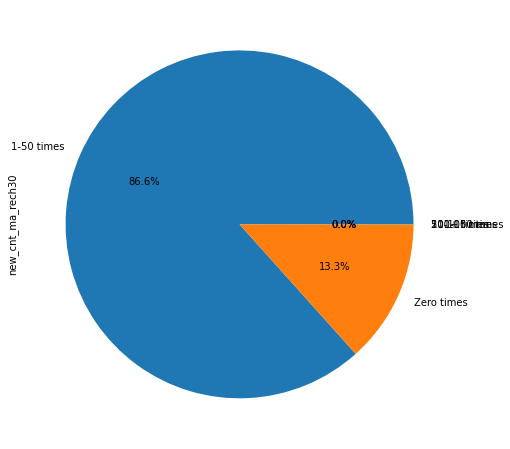

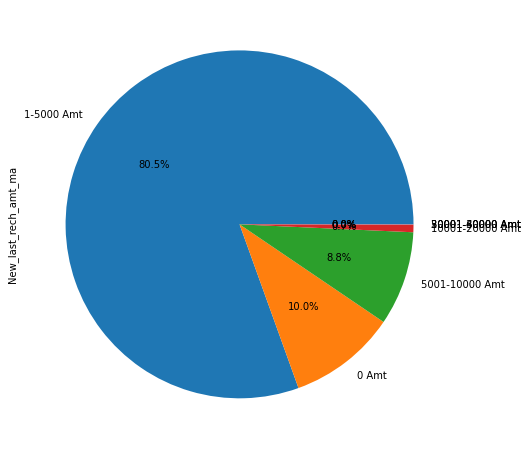

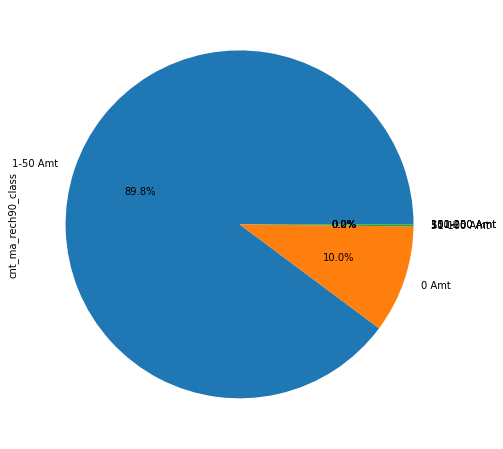

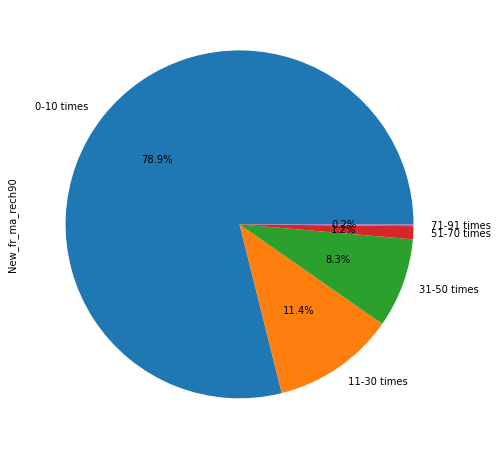

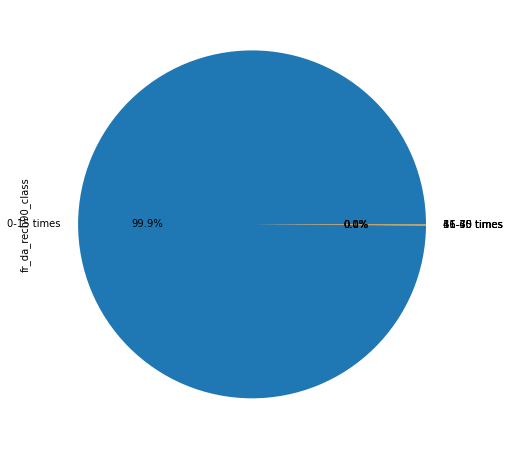

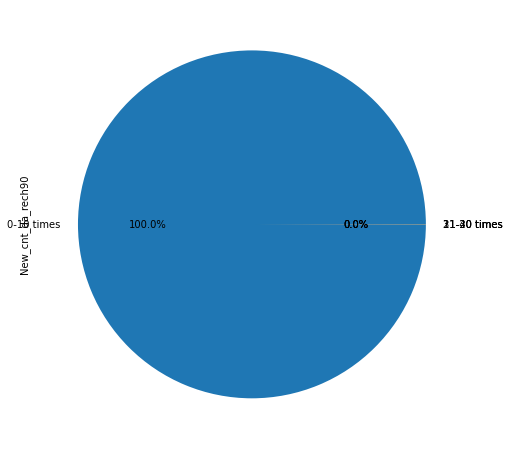

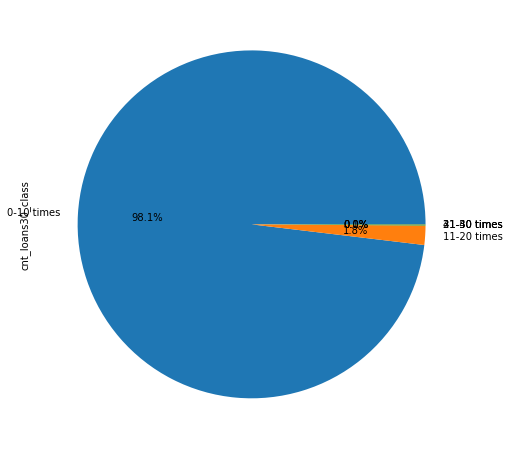

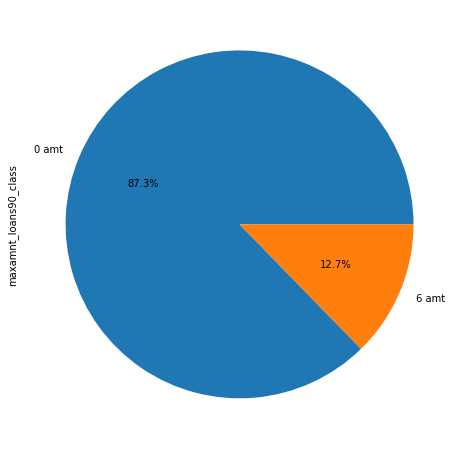

In [89]:
# We can see percentage of laon approval or rejection 
for i in object_col:
    plt.figure(figsize = (10, 8))
    df[i].value_counts().plot(kind = 'pie', autopct = '%.1f%%')


In [90]:
object_col

# ['policy_state', 'policy_csl', 'umbrella_limit', 'insured_sex',
#        'insured_education_level', 'insured_occupation', 'insured_hobbies',
#        'insured_relationship', 'incident_type', 'collision_type',
#        'incident_severity', 'authorities_contacted', 'incident_state',
#        'incident_city', 'property_damage', 'bodily_injuries', 'witnesses',
#        'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Index(['new_cnt_ma_rech30', 'New_last_rech_amt_ma', 'cnt_ma_rech90_class',
       'New_fr_ma_rech90', 'fr_da_rech90_class', 'New_cnt_da_rech90',
       'cnt_loans30_class', 'maxamnt_loans90_class'],
      dtype='object')

### Checking Ouliers

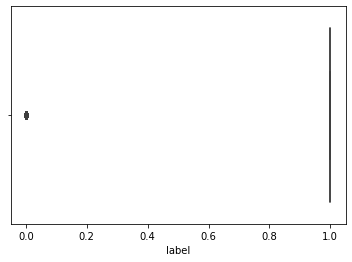

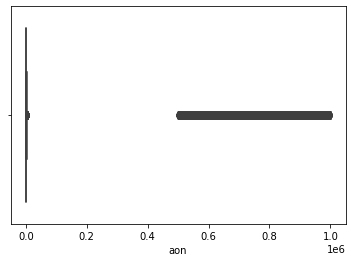

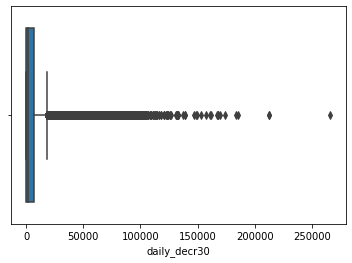

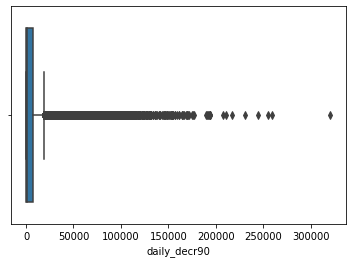

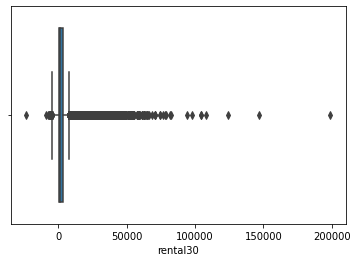

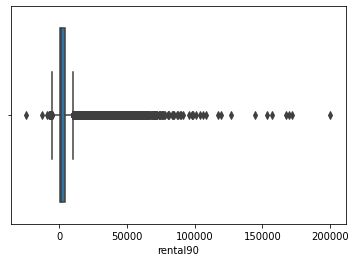

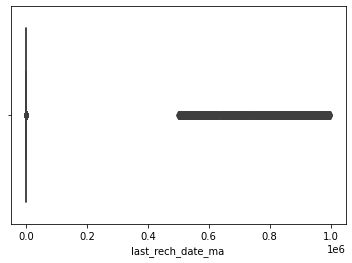

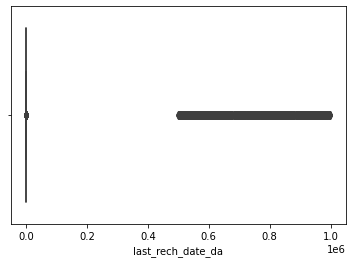

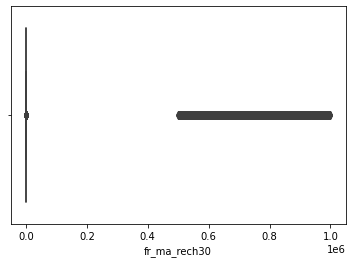

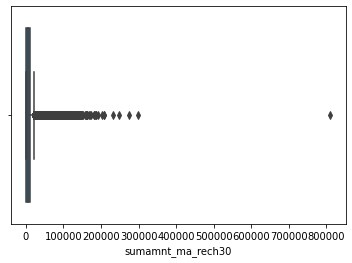

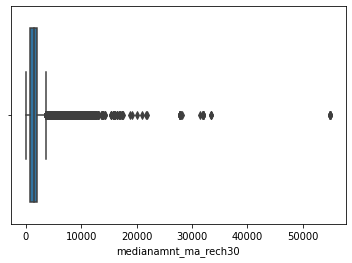

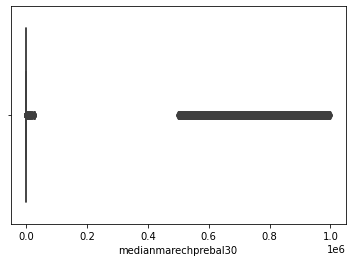

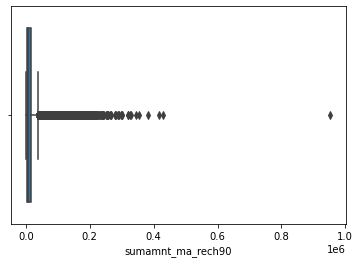

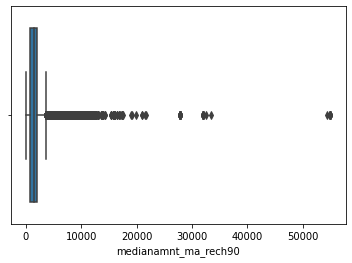

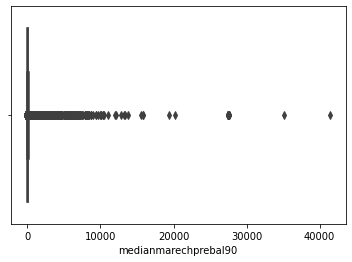

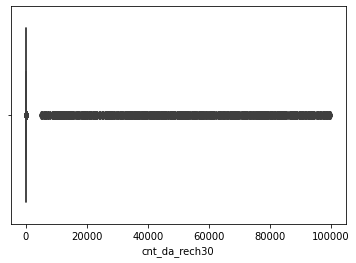

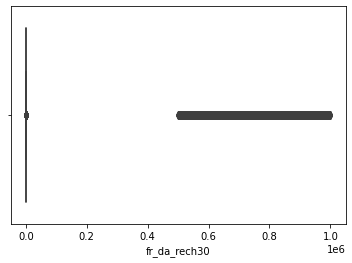

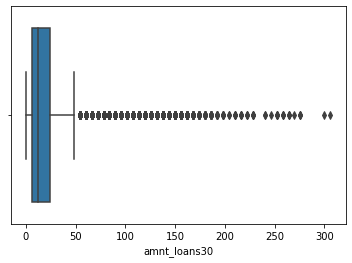

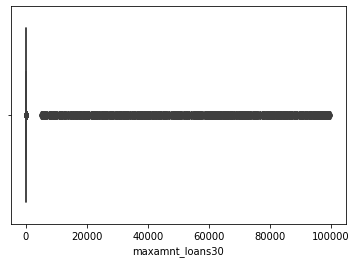

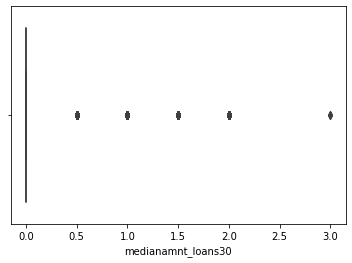

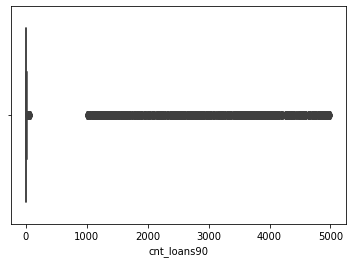

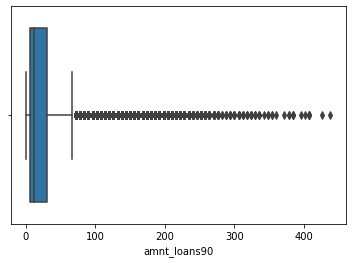

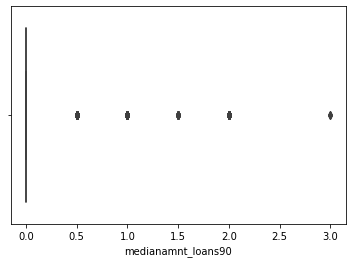

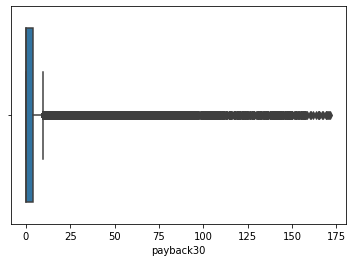

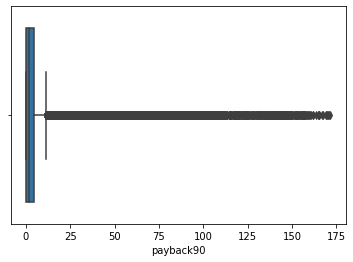

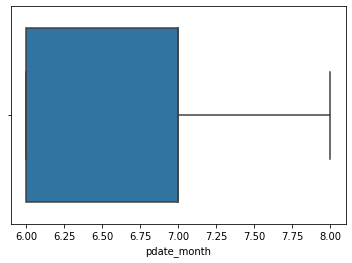

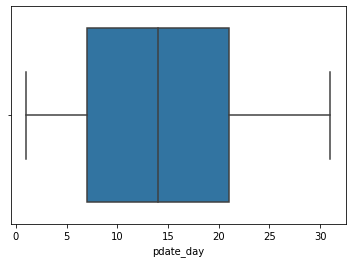

In [91]:
for i in numeric_col:
    plt.figure()
    sns.boxplot(df[i])

### Check skewness of numeric columns

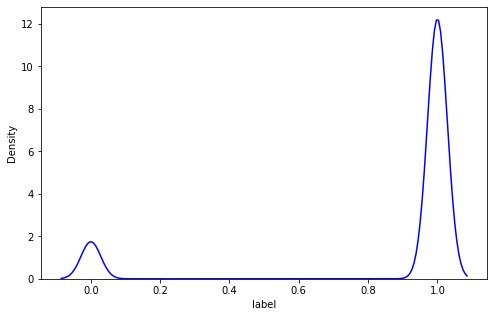

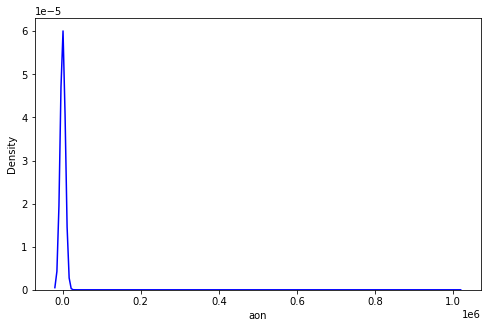

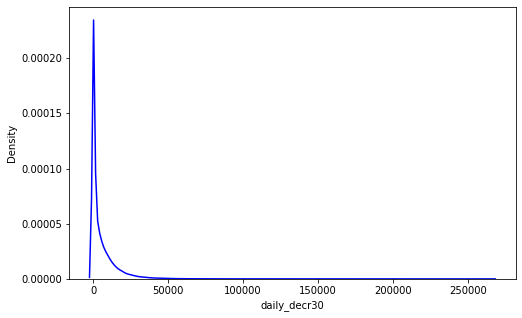

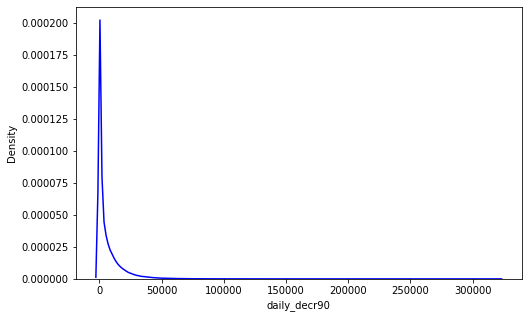

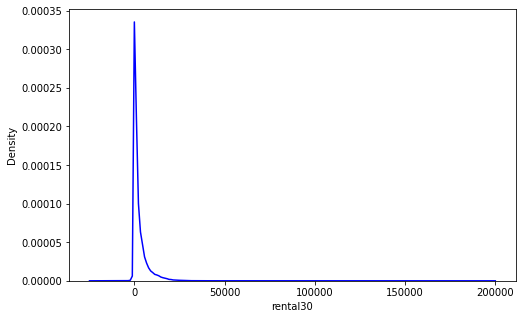

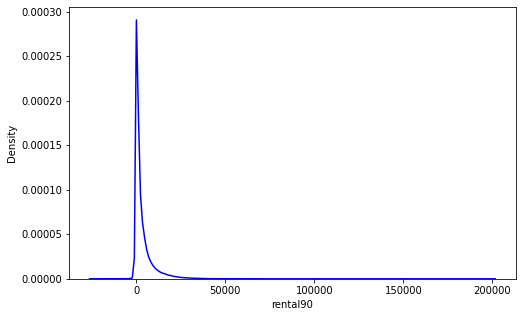

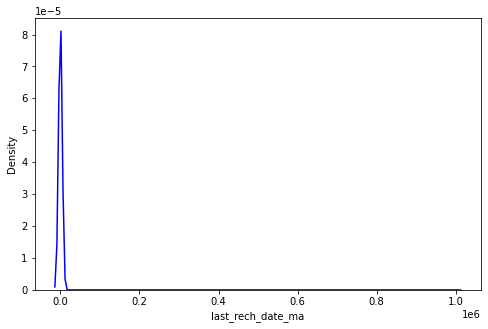

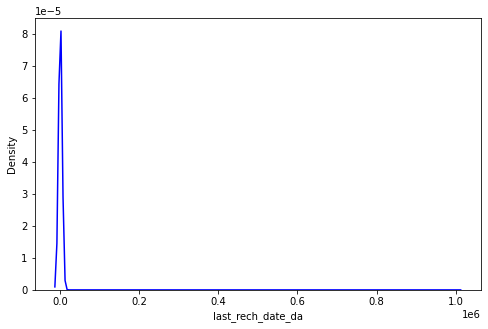

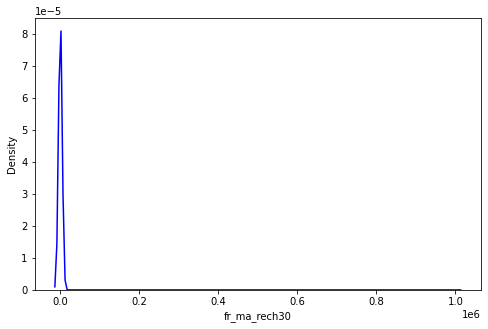

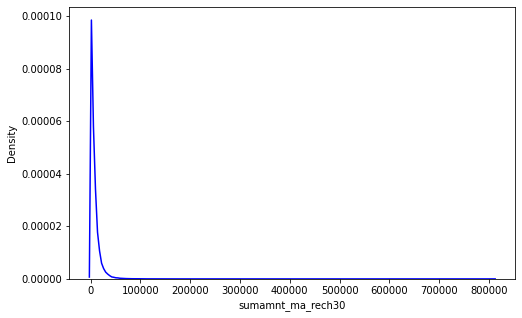

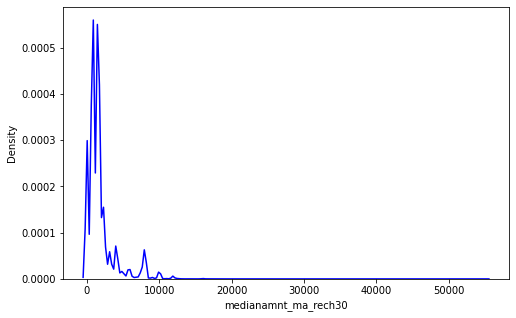

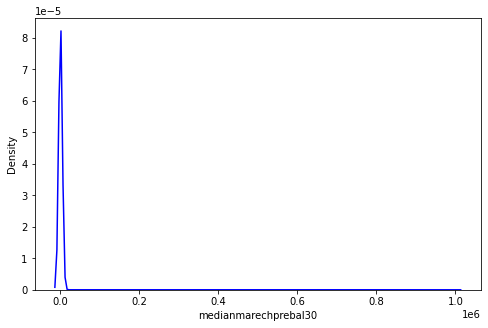

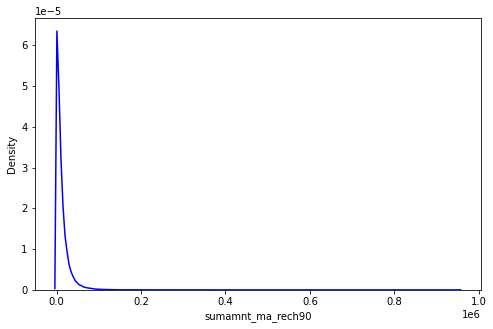

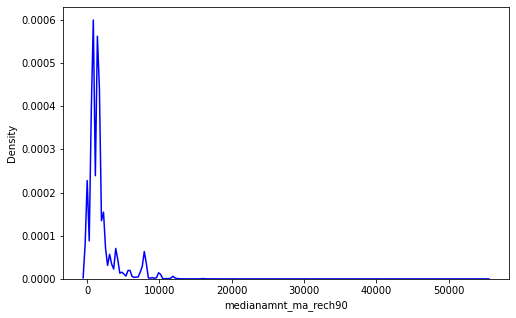

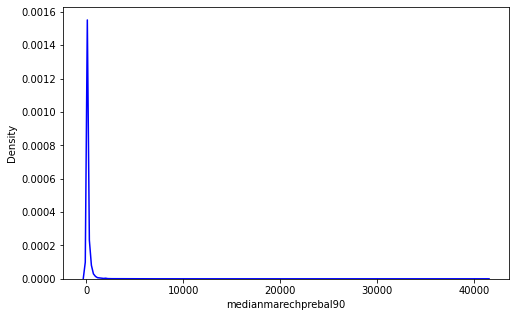

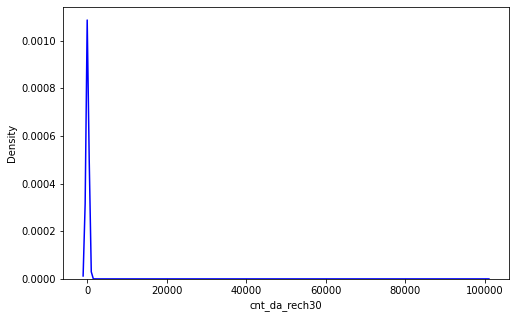

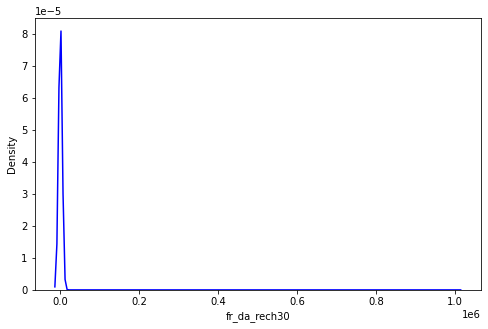

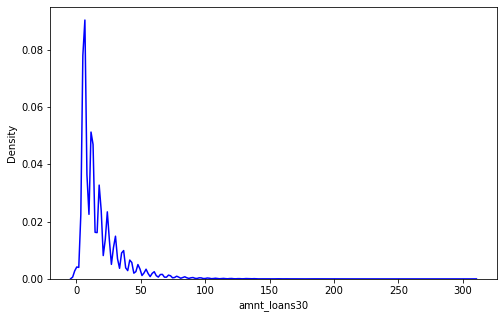

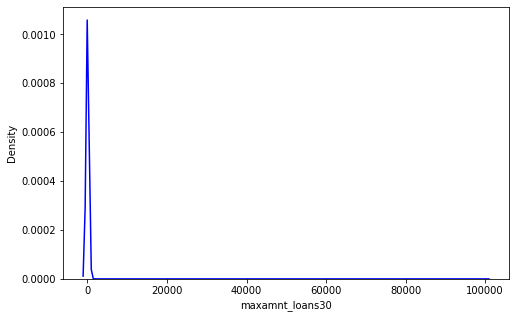

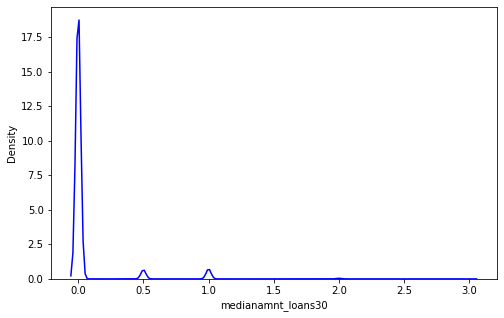

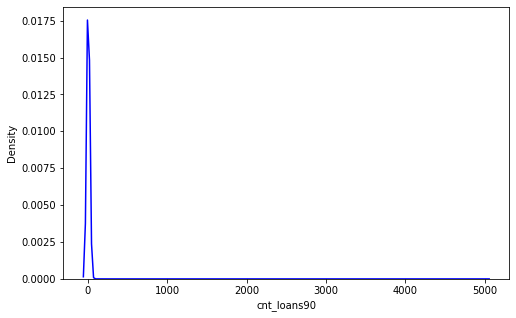

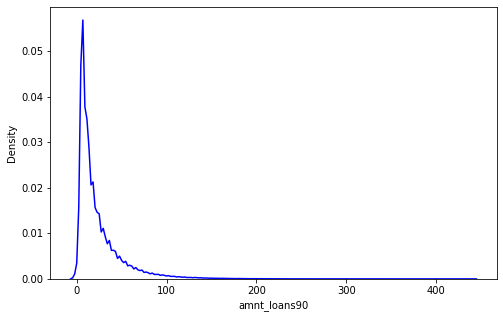

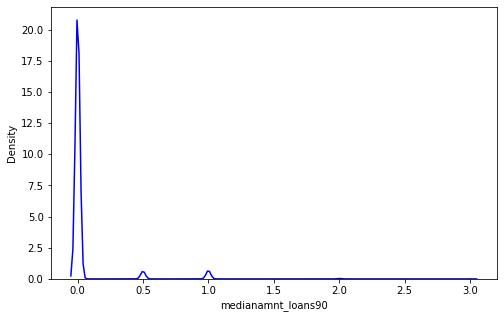

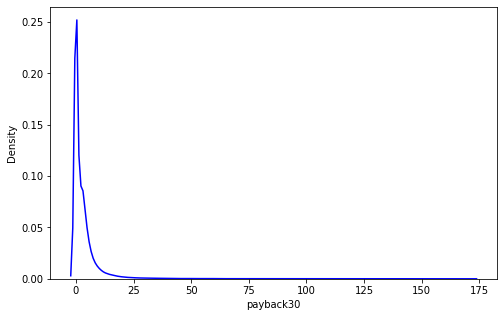

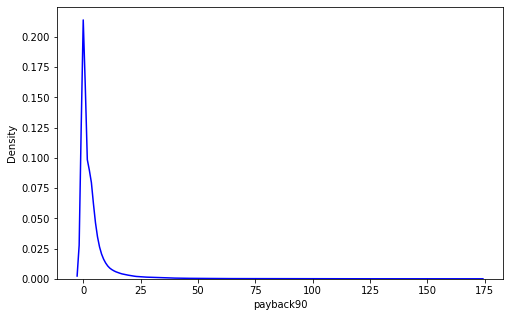

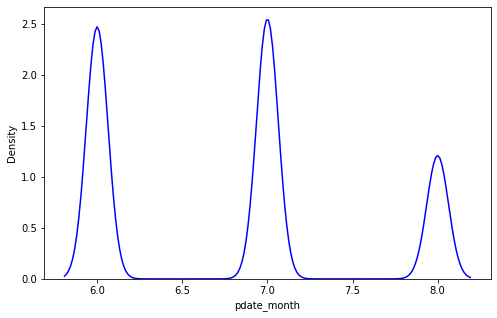

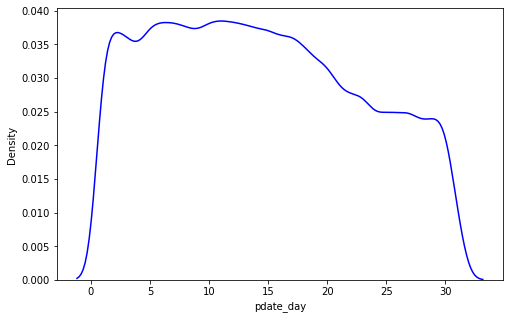

In [92]:
for i in numeric_col:
    plt.figure(figsize = (8,5))
    sns.distplot(df[i], color = 'b', hist = False)

### Distribution of Columns

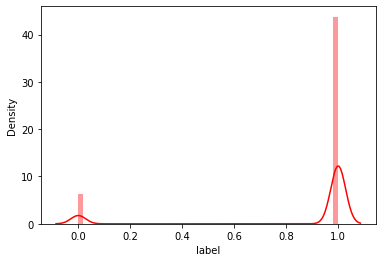

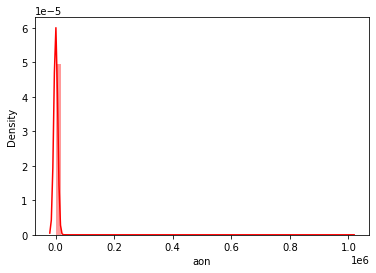

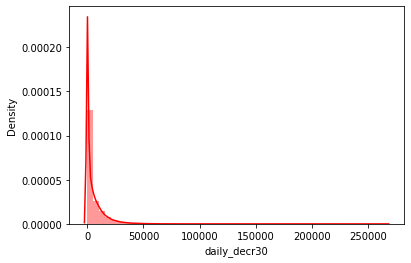

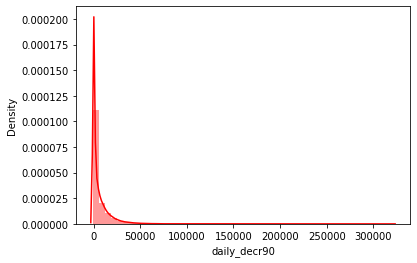

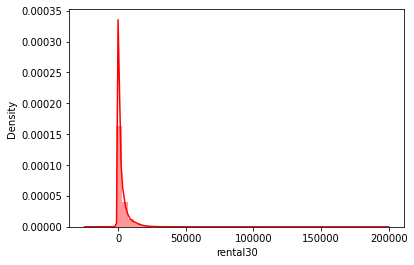

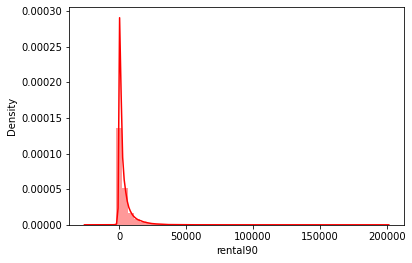

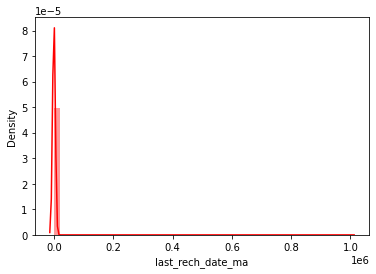

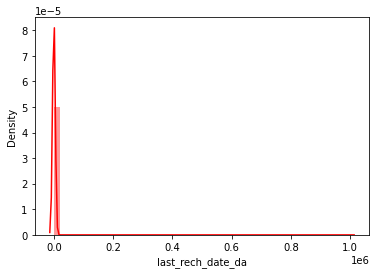

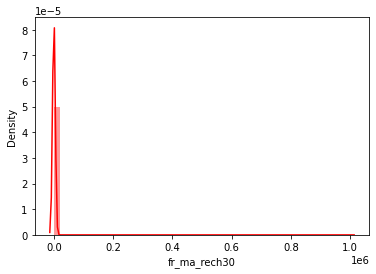

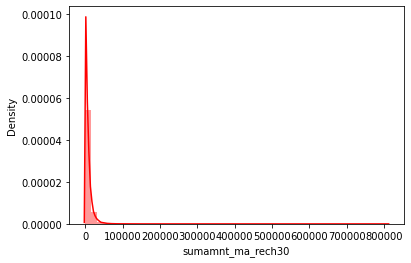

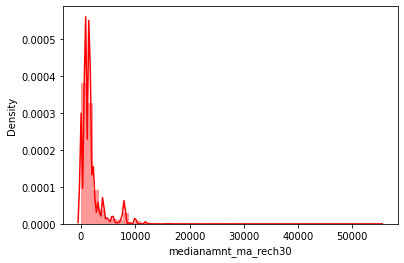

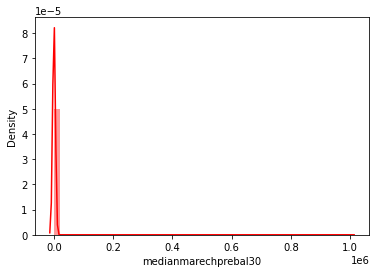

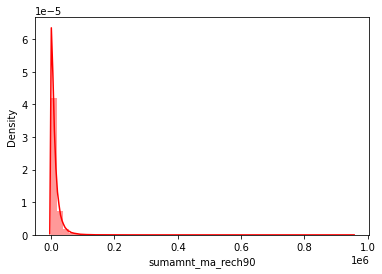

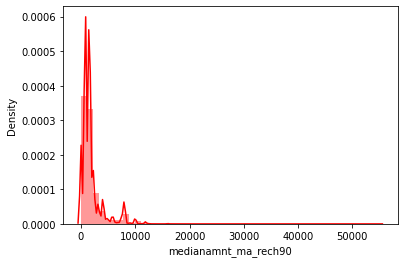

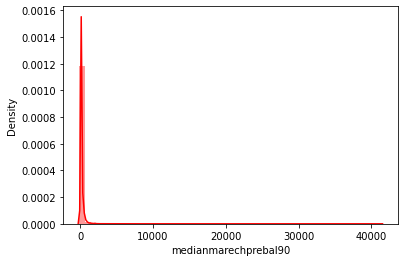

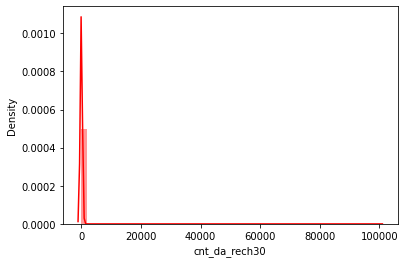

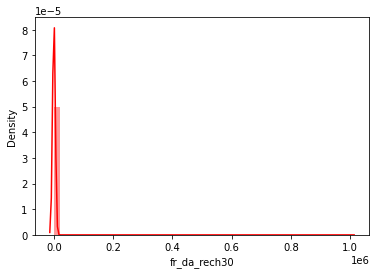

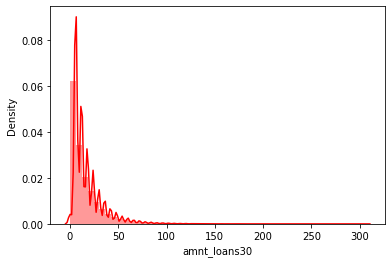

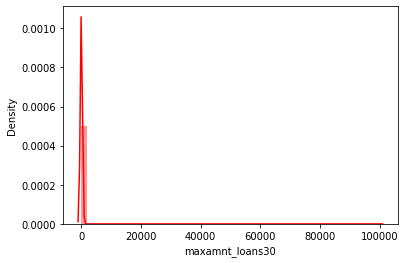

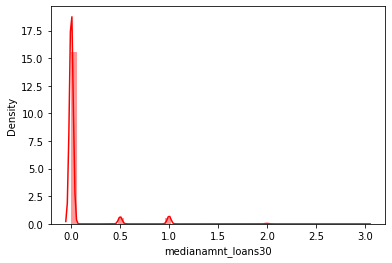

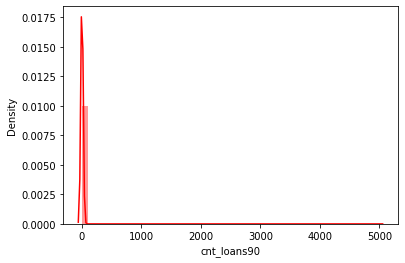

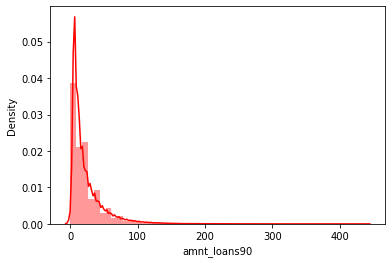

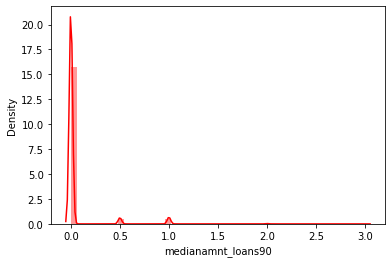

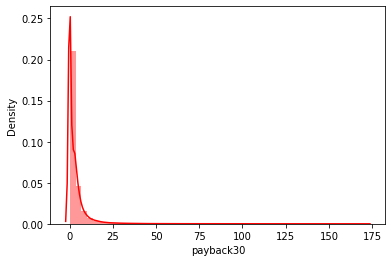

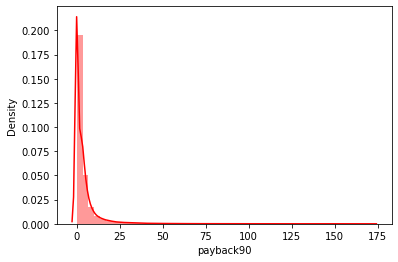

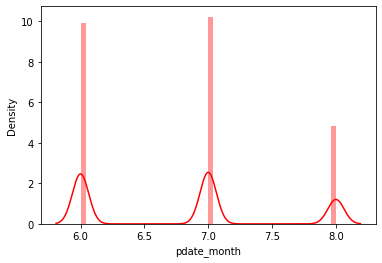

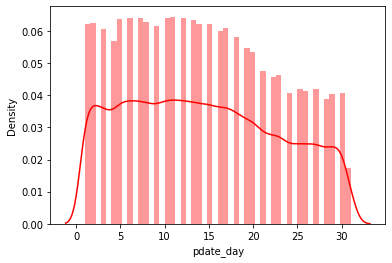

In [93]:
for i in numeric_col:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')

### Spread of Columns

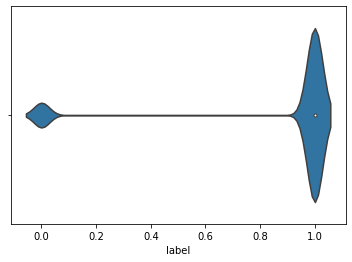

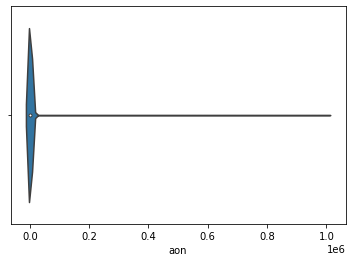

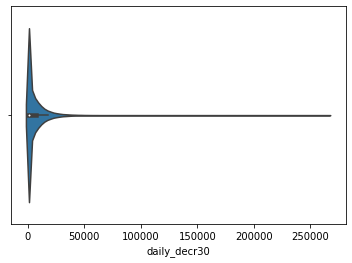

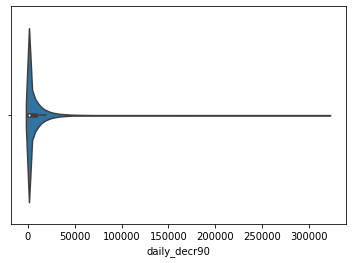

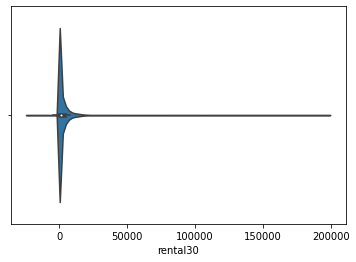

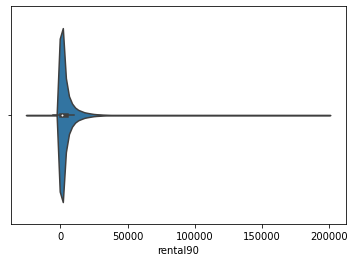

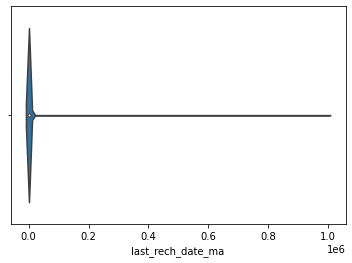

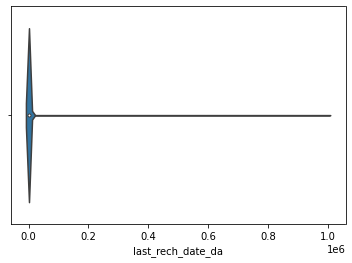

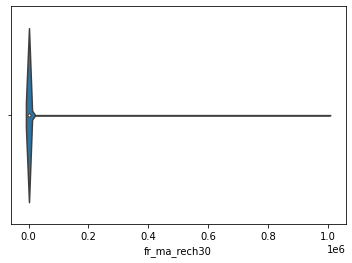

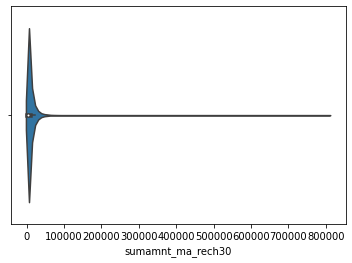

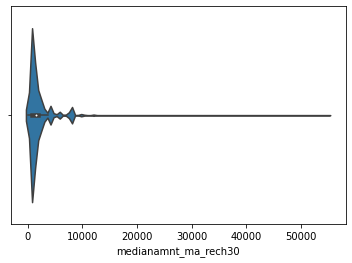

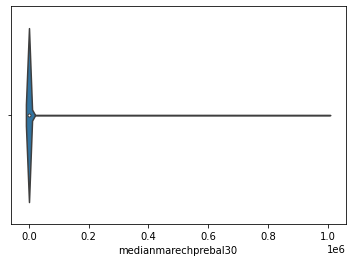

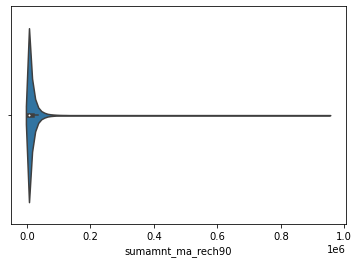

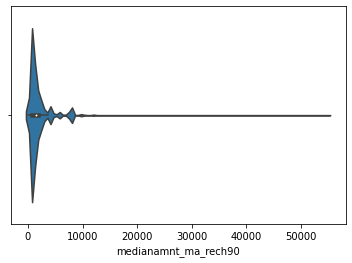

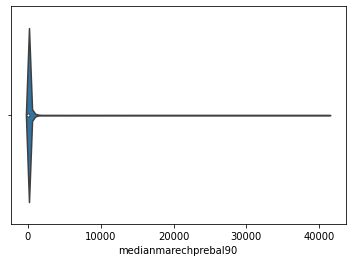

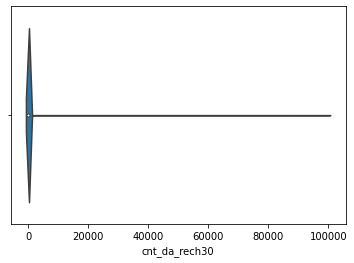

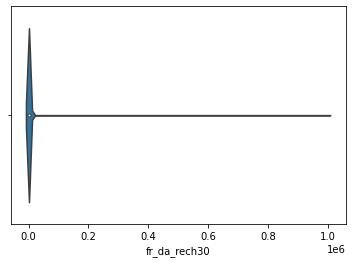

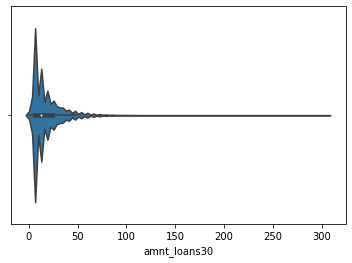

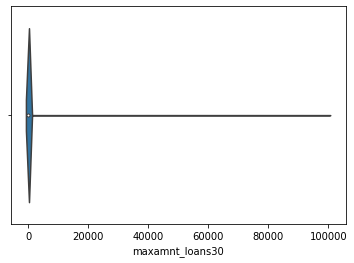

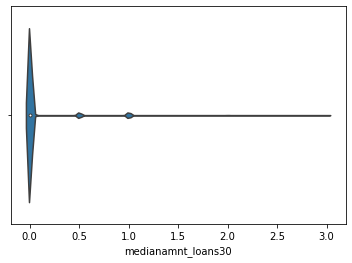

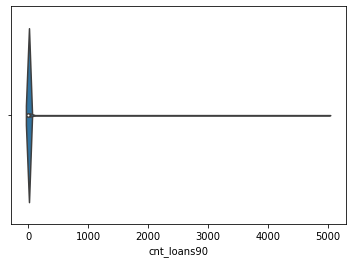

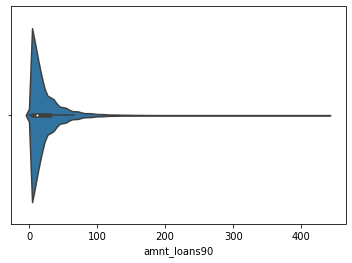

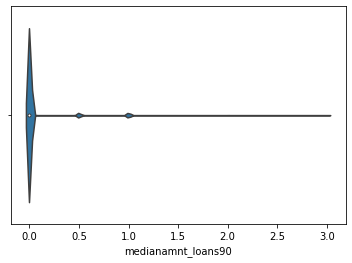

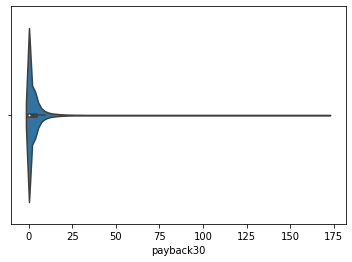

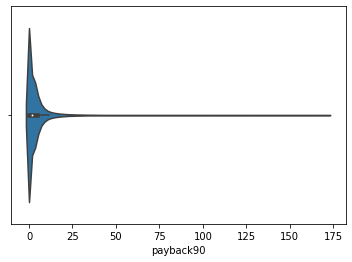

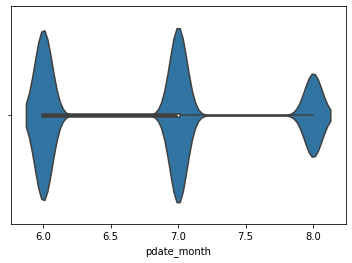

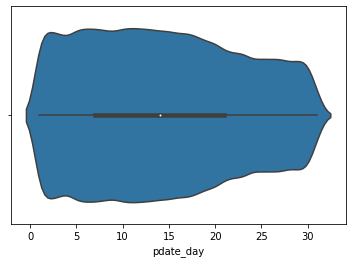

In [94]:
for i in numeric_col:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

### Knowing the pattern of data

In [95]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90,fr_da_rech90_class,New_cnt_da_rech90,cnt_loans30_class,maxamnt_loans90_class
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,3078,1539.0,7.50,0.0,0.0,12,6.0,0.0,2.0,12,0.0,29.000000,29.000000,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times,0-15 times,0-10 times,0-10 times,0 amt
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,5787,5787.0,61.04,0.0,0.0,12,12.0,0.0,1.0,12,0.0,0.000000,0.000000,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,6 amt
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,0.0,1539.0,1539.0,66.32,1539,1539.0,66.32,0.0,0.0,6,6.0,0.0,1.0,6,0.0,0.000000,0.000000,8,19,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,0 amt
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,0.0,0.0,0.0,0.00,947,947.0,2.50,0.0,0.0,12,6.0,0.0,2.0,12,0.0,0.000000,0.000000,6,6,Zero times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,0 amt
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2.0,20029.0,2309.0,29.00,23496,2888.0,35.00,0.0,0.0,42,6.0,0.0,7.0,42,0.0,2.333333,2.333333,6,22,1-50 times,1-5000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,0 amt


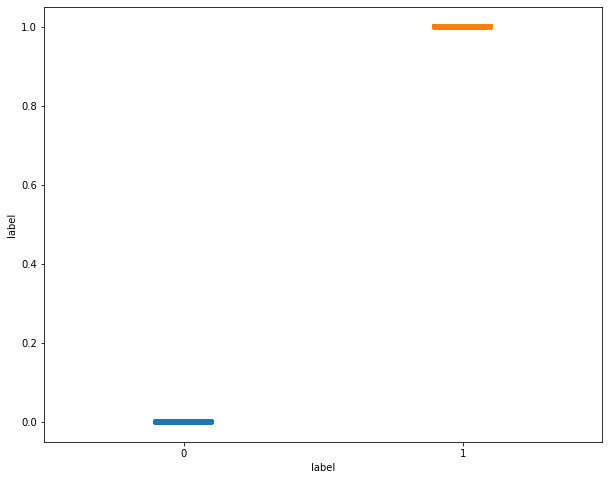

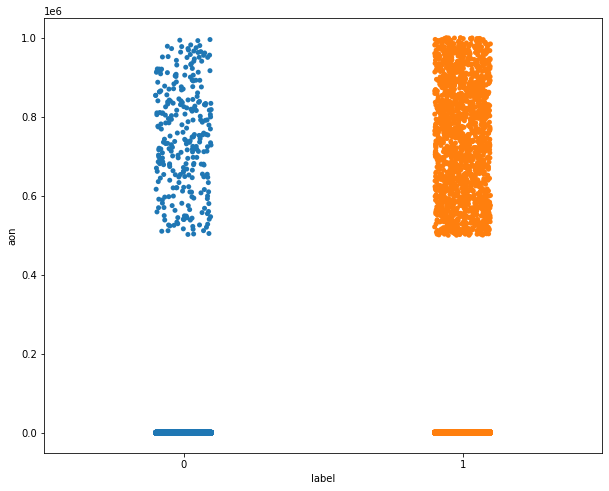

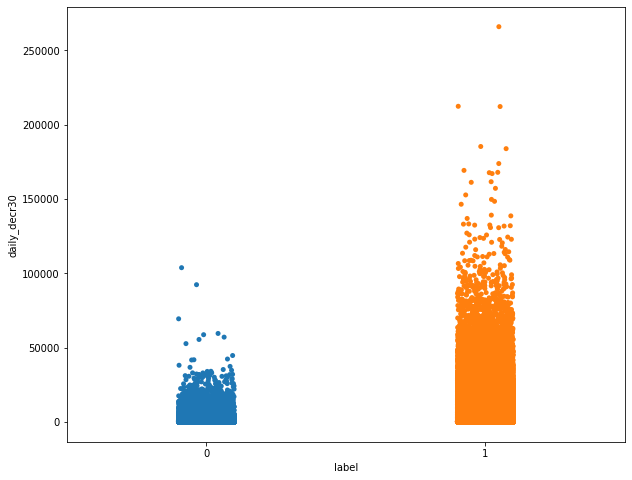

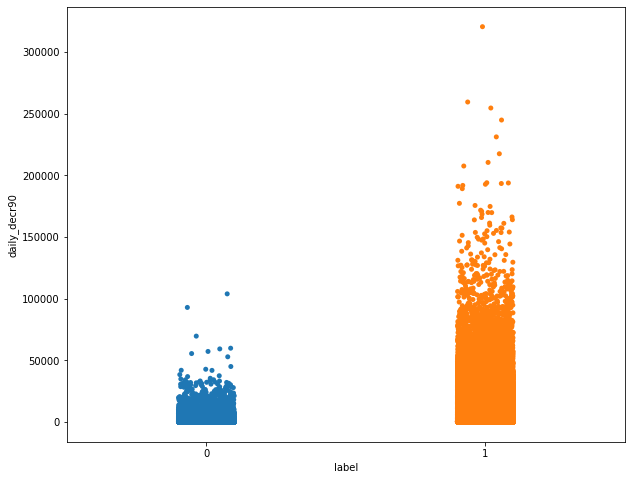

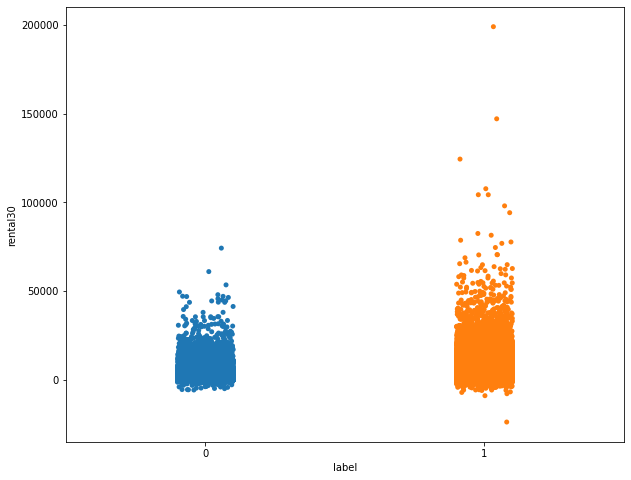

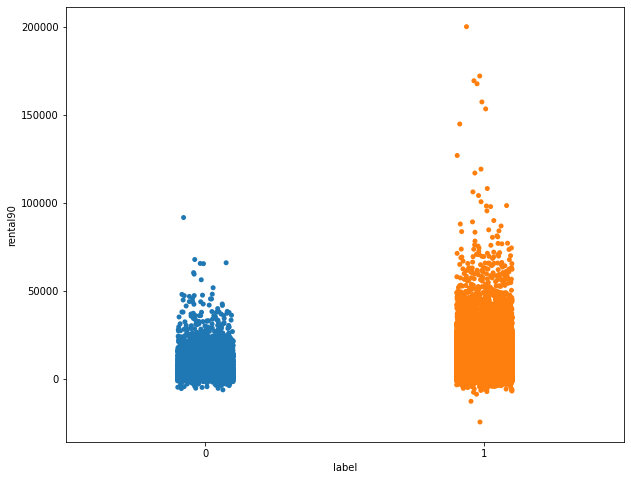

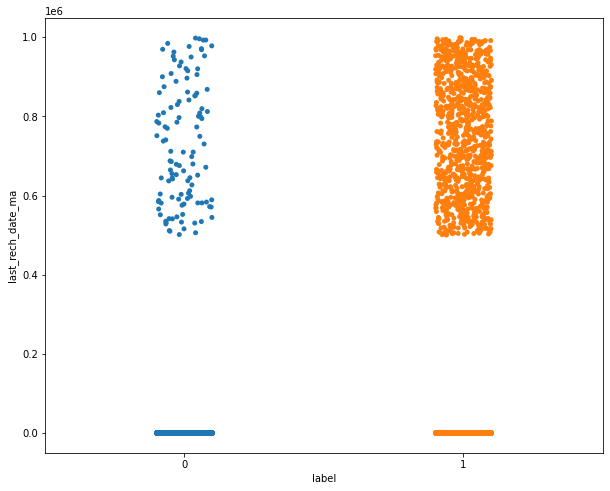

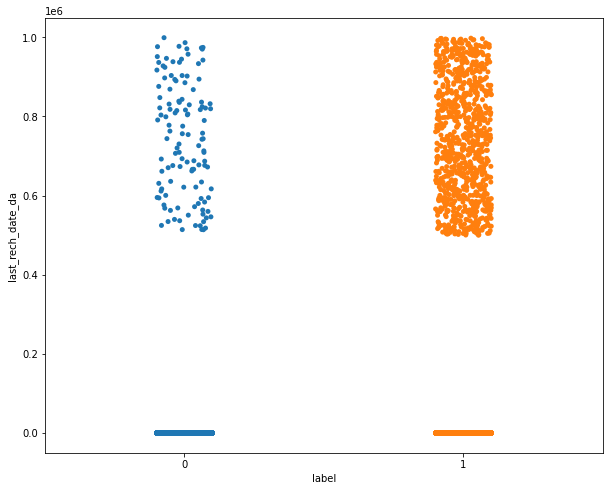

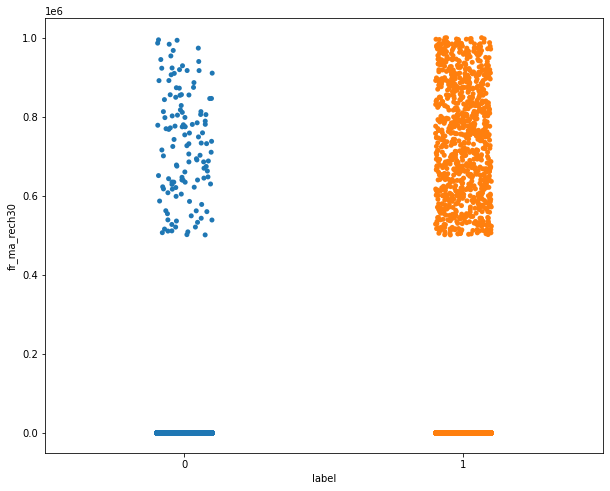

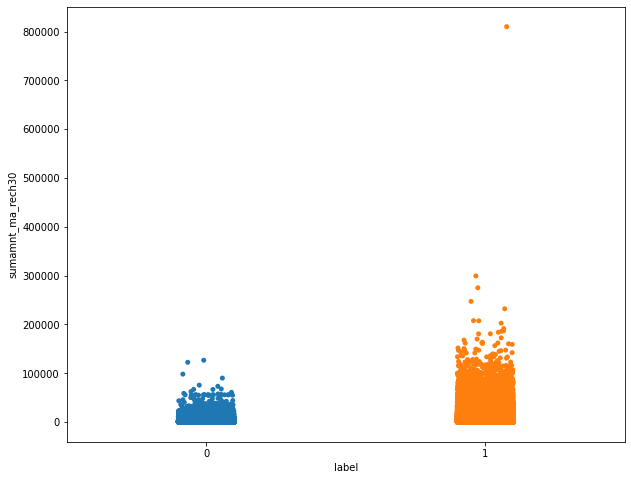

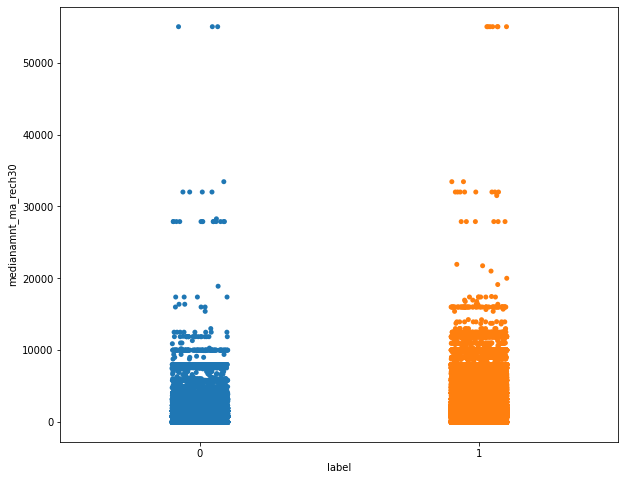

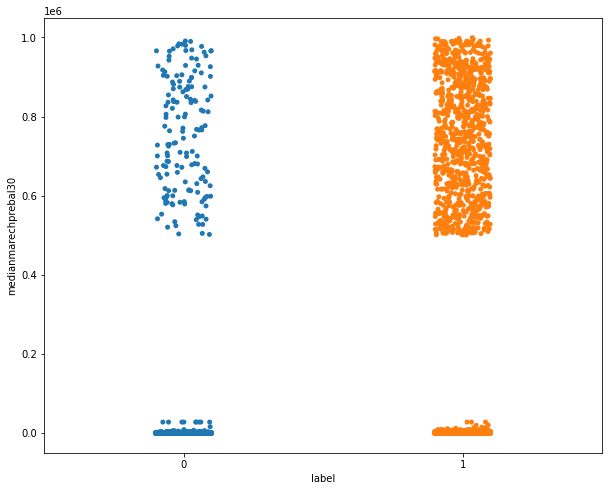

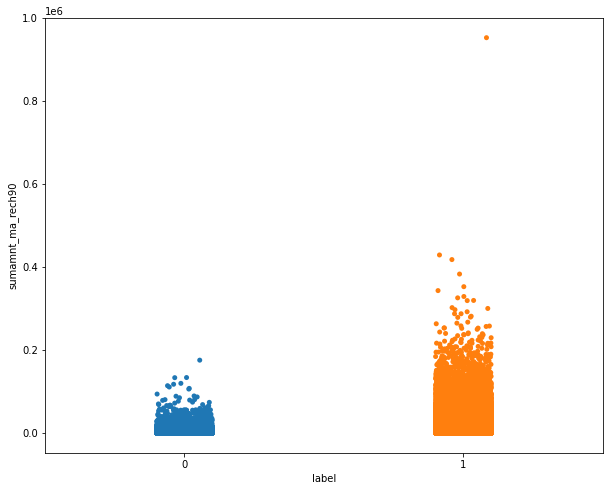

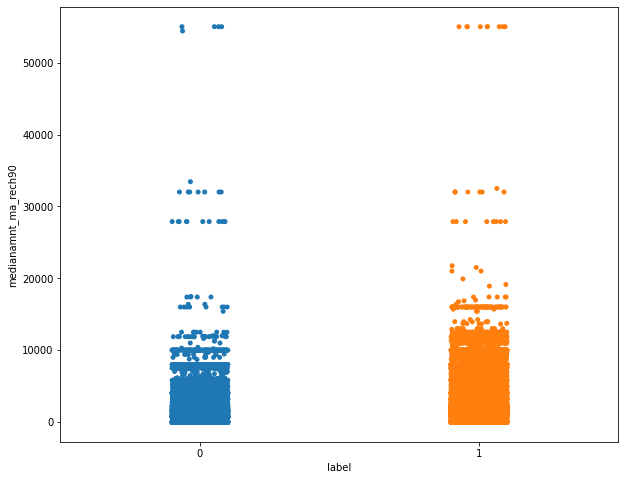

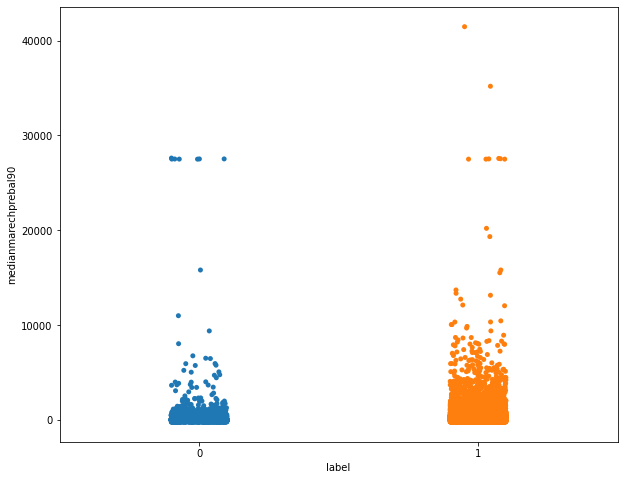

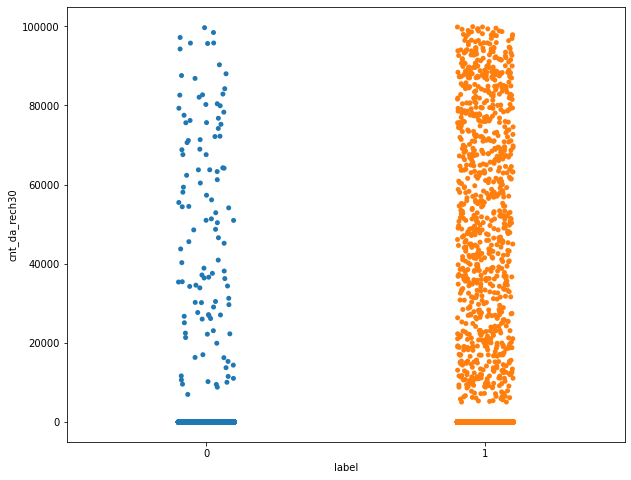

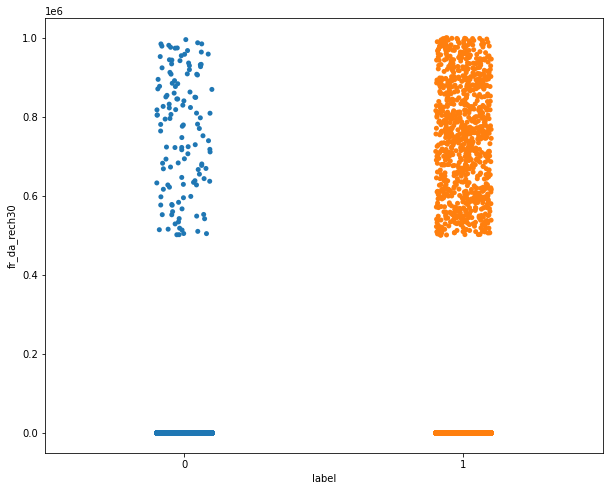

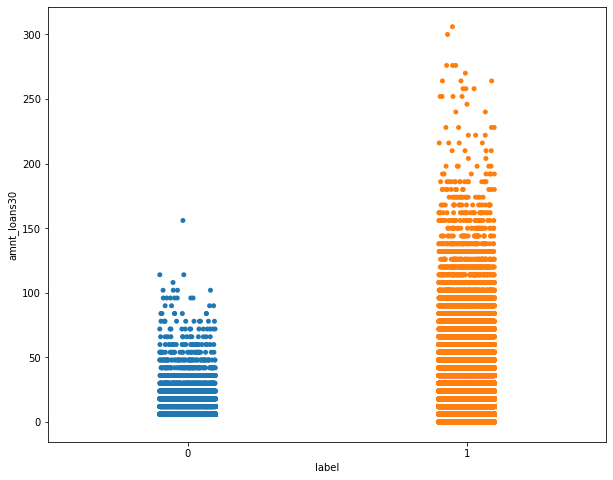

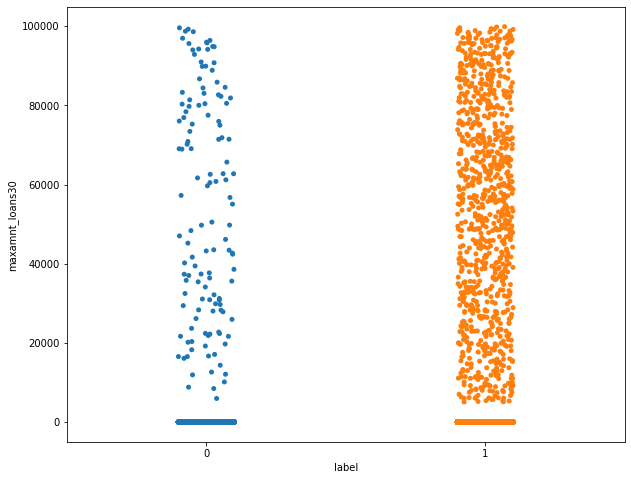

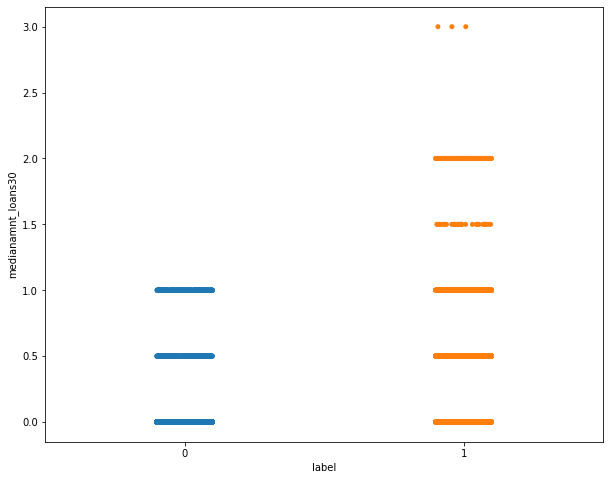

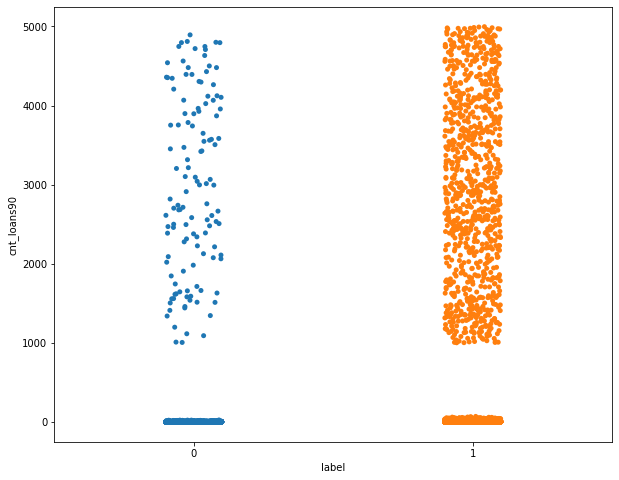

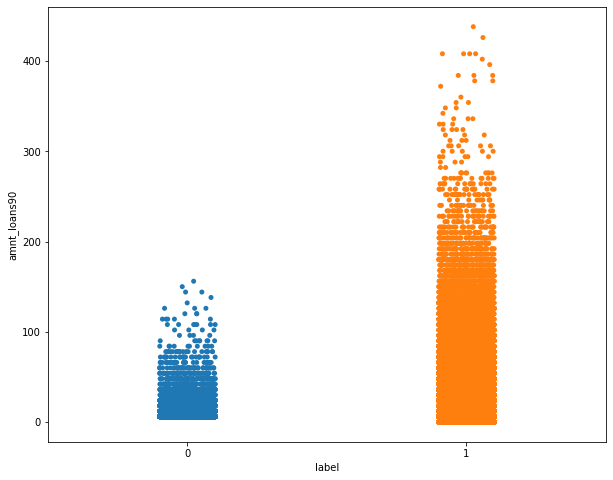

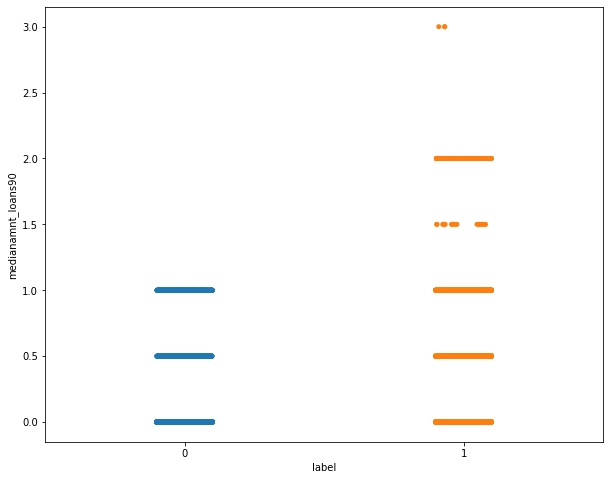

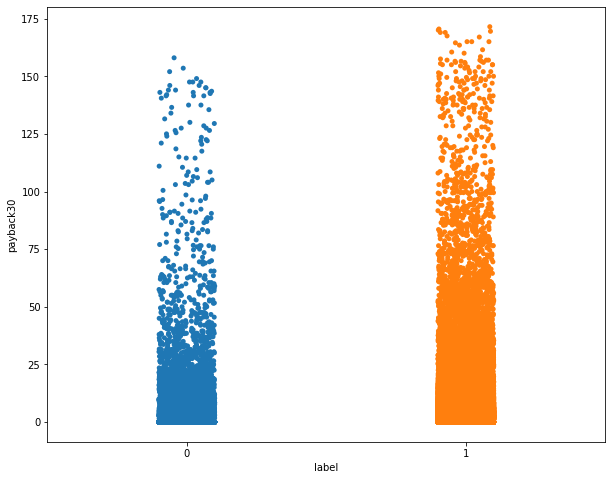

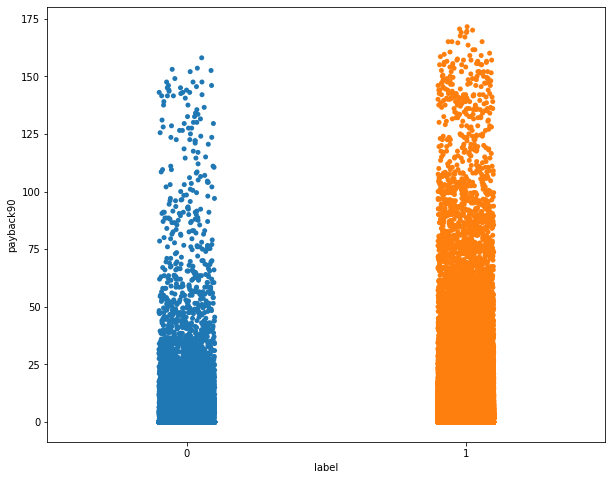

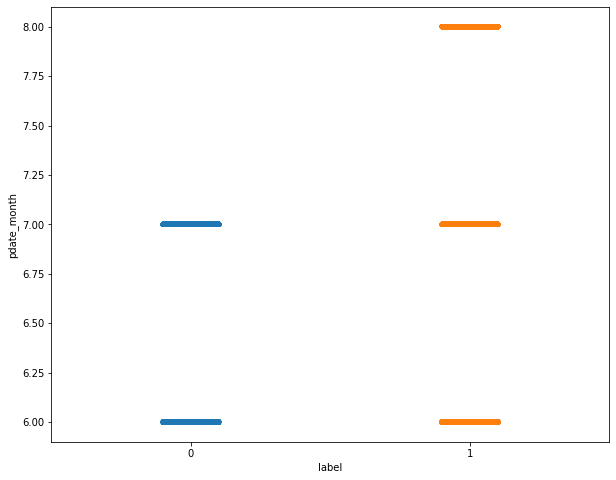

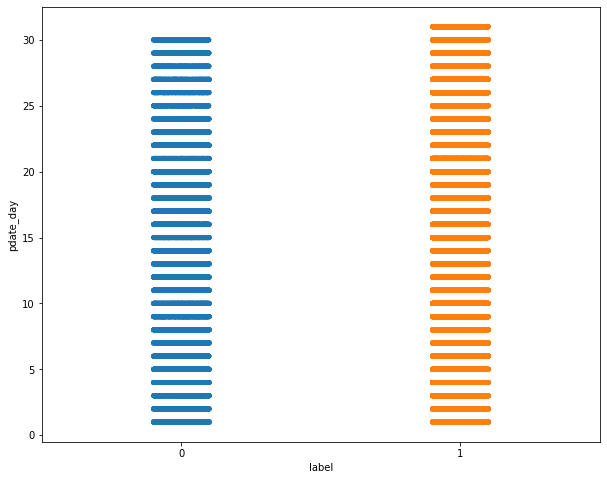

In [96]:
for i in numeric_col:                                       
    plt.figure(figsize = (10, 8))
    ax = sns.stripplot(df['label'], df[i])
    ax.set(xlabel = 'label', ylabel = i)

### Correlation of the columns

In [97]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.001330,0.202828,0.141490,-0.004829,0.205793,0.120855,0.039300,0.003827,-0.000027,0.197272,0.000248,0.044589,0.004733,0.199788,0.035747,0.048336,0.049183,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,-0.001163,0.000707,0.004306,0.003930,0.001011,0.004909,-0.000859,0.001564,0.000892,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,0.002771,0.001940,0.002203,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,-0.000577,0.636536,0.295356,-0.001153,0.762981,0.257847,0.037495,0.000700,-0.001499,0.471492,-0.000028,-0.011610,0.008962,0.563496,-0.037305,0.026915,0.047175,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,-0.000343,0.603886,0.282960,-0.000746,0.768817,0.250518,0.036382,0.000661,-0.001570,0.447869,0.000025,-0.005591,0.009446,0.567204,-0.034686,0.019400,0.040800,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,-0.001219,0.272649,0.129853,-0.001415,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.233453,-0.000864,-0.016482,0.004012,0.298943,-0.035489,0.072974,0.095147,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,-0.000503,0.259709,0.120242,-0.001237,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.231906,-0.001411,-0.009467,0.005141,0.327436,-0.034122,0.067110,0.099501,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.001629,0.002105,-0.001358,0.004071,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,0.000903,0.000928,0.001835,-0.000225,0.000870,0.002771,-0.002233,-0.001583,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,0.001158,0.000046,0.001037,0.002849,-0.000414,0.000219,0.004158,-0.003628,-0.000074,0.000536,0.000503,0.000061,-0.000972,0.000519,-0.002239,0.000077,0.000417,-0.001800,0.000631
fr_ma_rech30,0.001330,-0.001163,-0.000577,-0.000343,-0.001219,-0.000503,-0.001629,0.001158,1.000000,0.000714,-0.000579,0.002613,-0.000571,-0.001573,-0.002826,-0.000511,-0.001715,0.002470,-0.001100,-0.000331,0.003368,0.002634,-0.001292,0.001455,0.000998,-0.001682,0.000927
sumamnt_ma_rech30,0.202828,0.000707,0.636536,0.603886,0.272649,0.259709,0.002105,0.000046,0.000714,1.000000,0.489200,0.000007,0.889989,0.422009,0.090502,0.002537,-0.001578,0.531079,0.001633,-0.034460,0.009419,0.484761,-0.042244,0.000112,-0.012596,0.155682,0.056898


<AxesSubplot:>

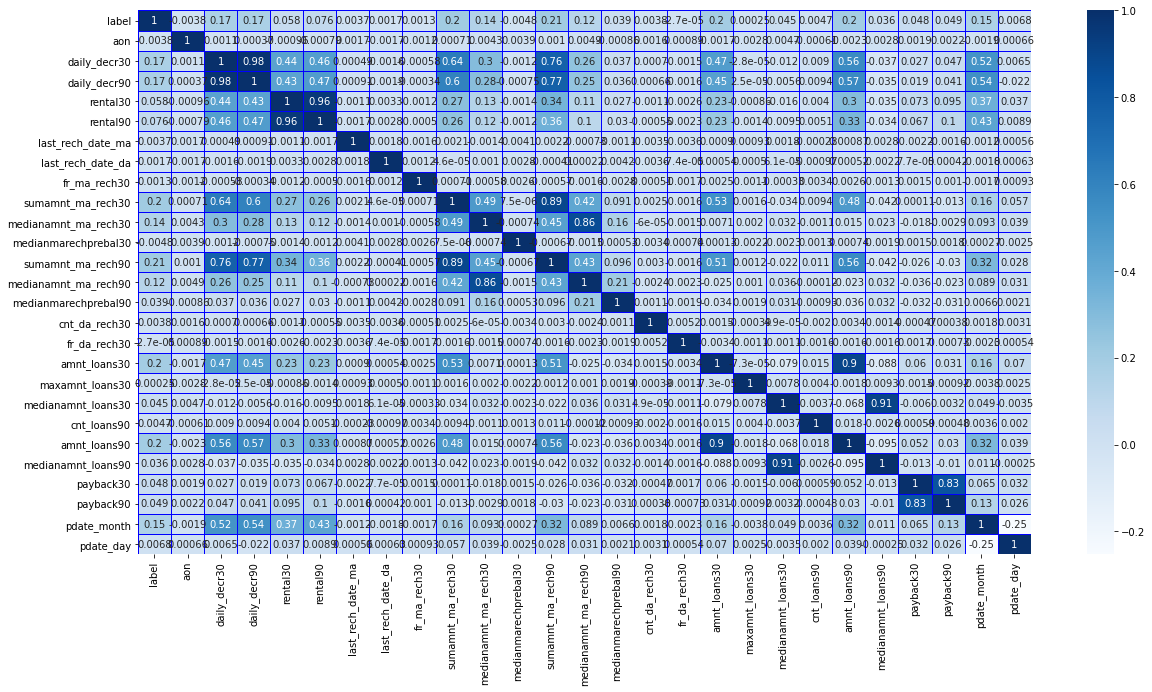

In [98]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

### Describe Data

In [99]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,3737.355121,7704.501157,1812.817952,3851.927942,12396.218352,1864.595821,92.025541,262.578110,3749.494447,17.952021,274.658747,0.054029,18.520919,23.645398,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,53643.625172,10139.621714,2070.864620,54006.374433,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,17.379741,4245.264648,0.218039,224.797423,26.469861,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,0.000000,1540.000000,770.000000,11.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,6.000000,6.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,2.000000,4628.000000,1539.000000,33.900000,7226.000000,1539.000000,36.000000,0.000000,0.000000,12.000000,6.000000,0.000000,2.000000,12.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,6.000000,10010.000000,1924.000000,83.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,24.000000,6.000000,0.000000,5.000000,30.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,999606.368132,810096.000000,55000.000000,999479.419319,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,306.000000,99864.560864,3.000000,4997.517944,438.000000,3.000000,171.500000,171.500000,8.000000,31.00000


<AxesSubplot:>

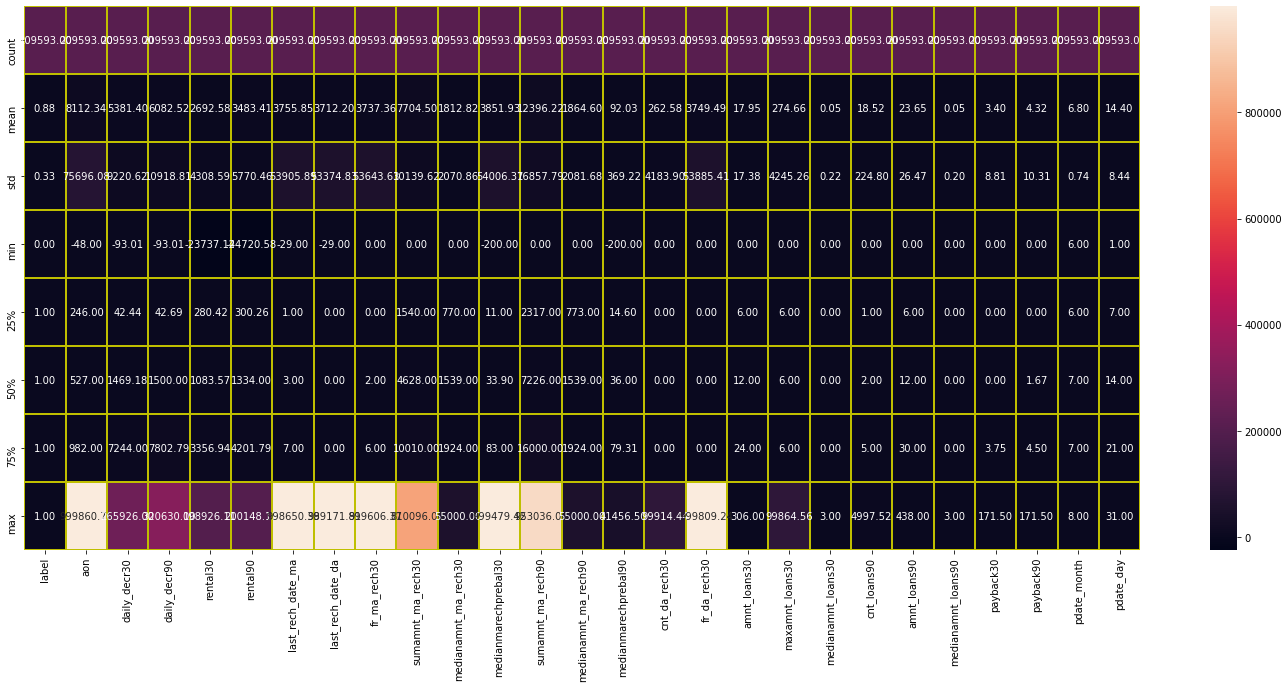

In [100]:
plt.figure(figsize = (25, 10))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

## Encoding

#### Applying OneHotEncoding to other categorical columns

In [101]:
encoded_df = df.copy()

In [102]:
encoded_df.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day,new_cnt_ma_rech30,New_last_rech_amt_ma,cnt_ma_rech90_class,New_fr_ma_rech90,fr_da_rech90_class,New_cnt_da_rech90,cnt_loans30_class,maxamnt_loans90_class
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,21.0,3078.0,1539.0,7.50,3078,1539.0,7.50,0.0,0.0,12,6.0,0.0,2.0,12,0.0,29.0,29.0,7,20,1-50 times,1-5000 Amt,1-50 Amt,11-30 times,0-15 times,0-10 times,0-10 times,0 amt
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,0.0,5787.0,5787.0,61.04,5787,5787.0,61.04,0.0,0.0,12,12.0,0.0,1.0,12,0.0,0.0,0.0,8,10,1-50 times,5001-10000 Amt,1-50 Amt,0-10 times,0-15 times,0-10 times,0-10 times,6 amt


In [103]:
# value count of categorical columns
for i in object_col:
    print( '------------------------------',i, ' column------------------------')
    print(encoded_df[i].value_counts())

------------------------------ new_cnt_ma_rech30  column------------------------
1-50 times       181580
Zero times        27979
51-100 times         32
101-150 times         1
200+ times            1
Name: new_cnt_ma_rech30, dtype: int64
------------------------------ New_last_rech_amt_ma  column------------------------
1-5000 Amt         168725
0 Amt               20995
5001-10000 Amt      18354
10001-20000 Amt      1454
30001-40000 Amt        33
50001-60000 Amt        28
20001-30000 Amt         4
Name: New_last_rech_amt_ma, dtype: int64
------------------------------ cnt_ma_rech90_class  column------------------------
1-50 Amt       188227
0 Amt           20950
51-100 Amt        404
101-150 Amt         9
151-200 Amt         2
300+                1
Name: cnt_ma_rech90_class, dtype: int64
------------------------------ New_fr_ma_rech90  column------------------------
0-10 times     165370
11-30 times     23906
31-50 times     17442
51-70 times      2528
71-91 times       347
Name: New

In [104]:
# Unique value of categorical columns
for i in object_col:
    print(i,'column having ',encoded_df[i].nunique(),'values')

new_cnt_ma_rech30 column having  5 values
New_last_rech_amt_ma column having  7 values
cnt_ma_rech90_class column having  6 values
New_fr_ma_rech90 column having  5 values
fr_da_rech90_class column having  5 values
New_cnt_da_rech90 column having  4 values
cnt_loans30_class column having  5 values
maxamnt_loans90_class column having  2 values


In [105]:
encoded_df = pd.get_dummies(encoded_df, columns = object_col)  # applying OneHotEncoding to the dataset

In [106]:
encoded_df.dtypes

label                                     int64
aon                                     float64
daily_decr30                            float64
daily_decr90                            float64
rental30                                float64
rental90                                float64
last_rech_date_ma                       float64
last_rech_date_da                       float64
fr_ma_rech30                            float64
sumamnt_ma_rech30                       float64
medianamnt_ma_rech30                    float64
medianmarechprebal30                    float64
sumamnt_ma_rech90                         int64
medianamnt_ma_rech90                    float64
medianmarechprebal90                    float64
cnt_da_rech30                           float64
fr_da_rech30                            float64
amnt_loans30                              int64
maxamnt_loans30                         float64
medianamnt_loans30                      float64
cnt_loans90                             

#### Checking impect of variables to the target variable

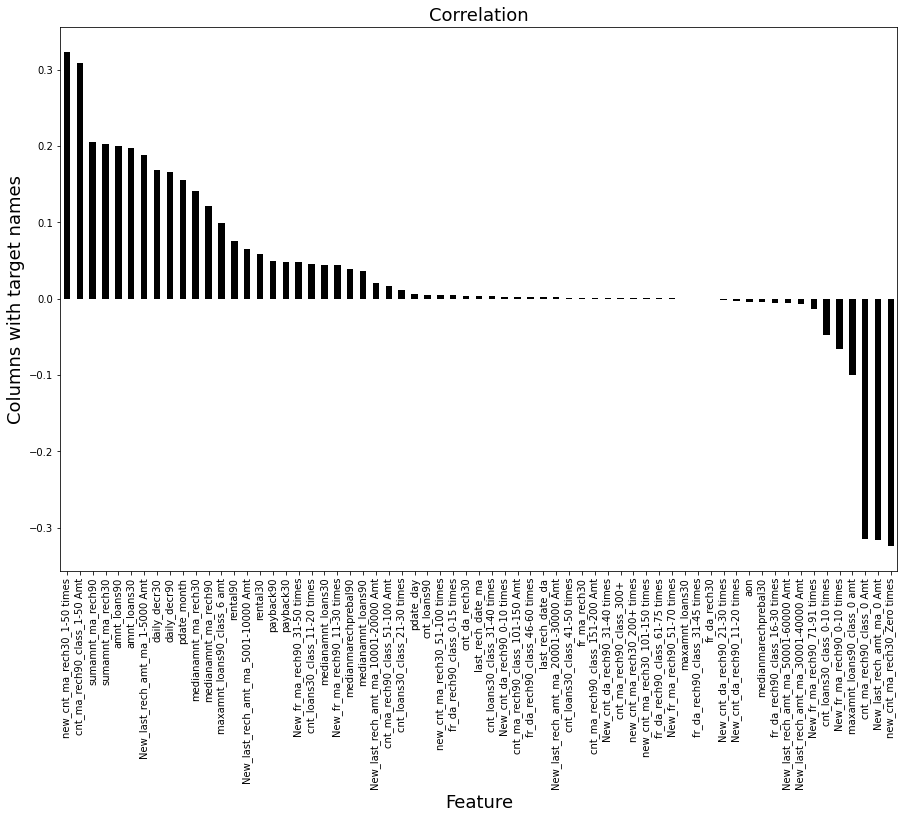

In [107]:
plt.figure(figsize = (15, 10))
encoded_df.corr()['label'].sort_values(ascending = False).drop(['label']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

### Remove Outliers

##### using zscore technique

In [108]:
from scipy.stats import zscore

In [109]:
# Zscore operation to remove outliers
z = np.abs(zscore(encoded_df) )
df_z = encoded_df[(z < 3).all(axis = 1)] 
df_z.shape

# (123134, 66)

(123134, 66)

In [110]:
((encoded_df.shape[0] - df_z.shape[0] ) / encoded_df.shape[0] ) * 100

# As by this method we are getting total loss, we cannot use this method
# 41.25

41.25090055488494

##### Using IQR technique

In [111]:
Q1 = encoded_df.quantile(0.25)
Q3 = encoded_df.quantile(0.75)
IQR = Q3 - Q1 

In [112]:
df_IQR = encoded_df[~((encoded_df < (Q1 - 1.5*IQR) ) | (encoded_df > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape   
# (0, 138)

(45631, 66)

In [113]:
((encoded_df.shape[0] - df_IQR.shape[0] ) / encoded_df.shape[0] ) * 100

# Total data loss found by both methods zscore and IQR therefore we will leave data as it is
# 100.0

78.22875763980667

### Seperating Data into x and y form

In [114]:
# x is training dataset and y is target variable
x = encoded_df.drop(columns = ['label'])
y = encoded_df['label']

print(x.shape)
print(y.shape)

# (209593, 65)
# (209593,)

(209593, 65)
(209593,)


In [115]:
y.unique()
# array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

### Apply SMOTE Technique to the target variable

In [116]:
y.value_counts()

# 1    183431
# 0     26162

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

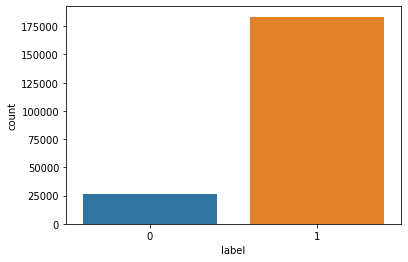

In [117]:
sns.countplot(y)

In [118]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [119]:
x, y = smote.fit_resample(x,y)

In [120]:
y.value_counts()

# 0    183431
# 1    183431

0    183431
1    183431
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

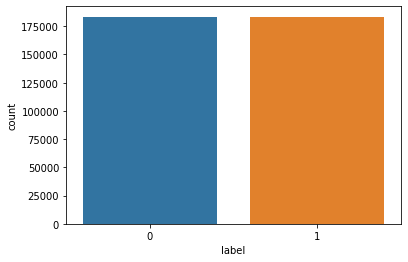

In [121]:
sns.countplot(y)

### Remove Skewness

In [122]:
numeric_col = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'amnt_loans30', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'pdate_month',
       'pdate_day']

In [123]:
col_skew = x[numeric_col].skew()
col_skew[col_skew > 0.5].keys()

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'amnt_loans30', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'pdate_month'],
      dtype='object')

In [124]:
skewed_col = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'amnt_loans30', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'pdate_month']

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [125]:
x[skewed_col] = pt.fit_transform(x[skewed_col])
# applying to skewed columns of dataset

In [126]:
x['last_rech_date_da'].min()

-250.18180304586335

In [127]:
x['last_rech_date_da'].max()

7.530888542478931

In [128]:
x[numeric_col].skew()

aon                       1.618776
daily_decr30            -14.154574
daily_decr90            -14.921989
rental30                 -1.111025
rental90                 -1.153049
last_rech_date_ma        -7.560395
last_rech_date_da      -136.906673
fr_ma_rech30              0.412946
sumamnt_ma_rech30        -0.371058
medianamnt_ma_rech30     -0.418927
medianmarechprebal30     -1.103270
sumamnt_ma_rech90        -0.317074
medianamnt_ma_rech90     -0.361965
medianmarechprebal90      7.918409
cnt_da_rech30             6.599449
fr_da_rech30             10.528930
amnt_loans30             -0.098979
maxamnt_loans30          -2.304965
medianamnt_loans30        3.453307
cnt_loans90               0.218656
amnt_loans90             -0.114919
medianamnt_loans90        3.664657
payback30                 0.644258
payback90                 0.510142
pdate_month               0.150968
pdate_day                 0.193545
dtype: float64

In [129]:
# all numeric columns are showing skewness value which is in acceptable range, Now, we can move ahead

### Multicoliearity

##### Using VIF Technique

In [130]:
# using VIF Technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [132]:
cal_vif(x[numeric_col])


,Columns Name,VIF
0,aon,1.008185
1,daily_decr30,400.687764
2,daily_decr90,410.325419
3,rental30,19.079928
4,rental90,20.175668
5,last_rech_date_ma,1.014720
6,last_rech_date_da,1.015816
7,fr_ma_rech30,1.858745
8,sumamnt_ma_rech30,42.842021
9,medianamnt_ma_rech30,24.638785


In [133]:
x.drop(columns = 'daily_decr90', inplace = True )

In [134]:
# print(numeric_col)
numeric_col = ['aon', 'daily_decr30', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'sumamnt_ma_rech90', 
'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'amnt_loans30', 'maxamnt_loans30', 
'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'pdate_month',
'pdate_day']

In [135]:
cal_vif(x[numeric_col])

,Columns Name,VIF
0,aon,1.008185
1,daily_decr30,4.775565
2,rental30,17.553816
3,rental90,18.464472
4,last_rech_date_ma,1.014632
5,last_rech_date_da,1.015815
6,fr_ma_rech30,1.858649
7,sumamnt_ma_rech30,40.762765
8,medianamnt_ma_rech30,23.962955
9,medianmarechprebal30,1.290481


In [136]:
x.drop(columns = 'sumamnt_ma_rech30', inplace = True )

In [137]:
numeric_col = ['aon', 'daily_decr30', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
'fr_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'sumamnt_ma_rech90', 
'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'amnt_loans30', 'maxamnt_loans30', 
'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'pdate_month',
'pdate_day']

In [138]:
cal_vif(x[numeric_col])

,Columns Name,VIF
0,aon,1.008173
1,daily_decr30,4.765544
2,rental30,17.312711
3,rental90,18.205886
4,last_rech_date_ma,1.014257
5,last_rech_date_da,1.015815
6,fr_ma_rech30,1.835296
7,medianamnt_ma_rech30,4.415399
8,medianmarechprebal30,1.290460
9,sumamnt_ma_rech90,10.135536


## Scaling

In [139]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [140]:
# x_scale = ss.fit_transform(x)
# x = pd.DataFrame(x_scale, columns = x.columns)
x[numeric_col] =  ss.fit_transform(x[numeric_col])

In [141]:
x.head(2)

,aon,daily_decr30,rental30,rental90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day,new_cnt_ma_rech30_1-50 times,new_cnt_ma_rech30_101-150 times,new_cnt_ma_rech30_200+ times,new_cnt_ma_rech30_51-100 times,new_cnt_ma_rech30_Zero times,New_last_rech_amt_ma_0 Amt,New_last_rech_amt_ma_1-5000 Amt,New_last_rech_amt_ma_10001-20000 Amt,New_last_rech_amt_ma_20001-30000 Amt,New_last_rech_amt_ma_30001-40000 Amt,New_last_rech_amt_ma_50001-60000 Amt,New_last_rech_amt_ma_5001-10000 Amt,cnt_ma_rech90_class_0 Amt,cnt_ma_rech90_class_1-50 Amt,cnt_ma_rech90_class_101-150 Amt,cnt_ma_rech90_class_151-200 Amt,cnt_ma_rech90_class_300+,cnt_ma_rech90_class_51-100 Amt,New_fr_ma_rech90_0-10 times,New_fr_ma_rech90_11-30 times,New_fr_ma_rech90_31-50 times,New_fr_ma_rech90_51-70 times,New_fr_ma_rech90_71-91 times,fr_da_rech90_class_0-15 times,fr_da_rech90_class_16-30 times,fr_da_rech90_class_31-45 times,fr_da_rech90_class_46-60 times,fr_da_rech90_class_61-75 times,New_cnt_da_rech90_0-10 times,New_cnt_da_rech90_11-20 times,New_cnt_da_rech90_21-30 times,New_cnt_da_rech90_31-40 times,cnt_loans30_class_0-10 times,cnt_loans30_class_11-20 times,cnt_loans30_class_21-30 times,cnt_loans30_class_31-40 times,cnt_loans30_class_41-50 times,maxamnt_loans90_class_0 amt,maxamnt_loans90_class_6 amt
0,-0.148932,0.652316,-0.531417,-0.518099,-0.050519,-0.078231,1.683565,0.512358,-0.017433,0.073957,0.411702,-0.224254,-0.148696,-0.094205,0.258156,-0.103727,-0.269656,0.226432,0.138456,-0.255983,1.728668,1.700127,0.692431,0.755358,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0.057822,1.392223,0.432241,0.260566,0.209411,-0.078231,-0.898008,1.542994,0.040719,0.377303,1.611735,0.102862,-0.148696,-0.094205,0.258156,1.435647,-0.269656,-0.837851,0.138456,-0.255983,-0.752907,-0.817336,1.665572,-0.531429,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [142]:
y.unique()

array([0, 1], dtype=int64)

### Machine Learning

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [147]:
def ML_Model (algorithms, x, y ):  
    
    for algo in algorithms :
        max_acc = 0
        random_s = 0

        for i in range(0, 50):
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
            model = algo
            model.fit(x_train, y_train)
            model_pred = model.predict(x_test)
            acc = accuracy_score(model_pred, y_test)
    
            if acc > max_acc:
                max_acc = acc
                random_s = i
        print('\n______________________________________________________________________________')
        print(algo ,' is giving best accurancy', max_acc, 'on random state of', random_s )

        
            # train the model
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = random_s)
        model = algo
        model.fit(x_train, y_train)
    
        # predict the training set
        pred = model.predict(x_test)
        m_pred = model.predict(x_train)
    
        training = accuracy_score(m_pred, y_train)
        testing = accuracy_score(pred, y_test)
        
        print('Training accuracy is : ', training)
        print('Testing accuracy is :', testing) 
    
        print('-------------------------------------------------------------------------------')
        print('Classification Report: \n', classification_report(pred, y_test) )
        print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
        print('--------------------------------------------------------------------------------')
        print('Cross value score')
    
        # perform cross-validation
        for i in range(2, 8):
            cv_score = cross_val_score(model, x, y, cv = i ).mean()
            print('cv score',  cv_score ,'at', i, 'cross fold')
        print('--------------------------------------------------------------------------------')
        print('AUC-ROC Score')
        auc_score = roc_auc_score( y_test, pred)
        print('auc_score: ', auc_score)

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [263]:
lr = LogisticRegression()
abc = AdaBoostClassifier()
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()


models = [lr,abc, dtc, gbc]
ML_Model(models, x, y)


______________________________________________________________________________
LogisticRegression()  is giving best accurancy 0.8285737649806013 on random state of 23
Training accuracy is :  0.8254187061677628
Testing accuracy is : 0.8285737649806013
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     56520
           1       0.81      0.84      0.83     53539

    accuracy                           0.83    110059
   macro avg       0.83      0.83      0.83    110059
weighted avg       0.83      0.83      0.83    110059

Confusion Matrix: 
 [[46245 10275]
 [ 8592 44947]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.8262071296563831 at 2 cross fold
cv score 0.8260218393782893 at 3 cross fold
cv score 0.8260818115678312 at 4 cross fold
cv score 0.8256211827515895 at 5 c

In [151]:
# As in above output, we can see, GradientBoostingClassifier is performing best as compare to other ML model
# its cv value is also very close to accuracy of model ,
# and it is also giving AUC-ROC Score 0.90
# Hence we will apply hyper parameter tuning for GradientBoostClassifier to increase the accuracy of model

##### Ensemble Technique of GradientBoostingClassifier

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 28)

  #### Hyper Parameter Tuning

In [152]:
parameter = {'loss' : ['deviance', 'exponential'], 
             'learning_rate' : [0.1, 0.01],
             'criterion' : ['friedman_mse', 'squared_error'],
             'n_estimators': [100, 50, 10]  } 

In [154]:
gcv = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = parameter, cv = 3)
gcv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.01],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 50, 10]})

In [155]:
gcv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'n_estimators': 100}

In [149]:
ensemble_gbc = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.1, loss = 'exponential', n_estimators= 100 )
models = [ensemble_gbc]
ML_Model(models, x, y)


______________________________________________________________________________
GradientBoostingClassifier(loss='exponential')  is giving best accurancy 0.9075223289326634 on random state of 39
Training accuracy is :  0.9060213471026429
Testing accuracy is : 0.9075223289326634
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     56050
           1       0.90      0.91      0.91     54009

    accuracy                           0.91    110059
   macro avg       0.91      0.91      0.91    110059
weighted avg       0.91      0.91      0.91    110059

Confusion Matrix: 
 [[50498  5552]
 [ 4626 49383]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.8986131024745 at 2 cross fold
cv score 0.898294283521366 at 3 cross fold
cv score 0.8996899146978862 at 4 cross fold
cv score 0.8

In [152]:
# As we can after applying this hyper parameter tuning cv score is increase by some narrow change,
# therefore, Gradient Boost with no parameter is giving more good result as compare to after applying ensemble

#### Final Model (GradientBoostingClassifier)

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 28)
final_model = GradientBoostingClassifier()
final_model.fit(x_train, y_train)
predict_train = final_model.predict(x_train)
predict_test = final_model.predict(x_test)

training = accuracy_score(predict_train, y_train)
testing = accuracy_score(predict_test, y_test)

print('At random state', i, 'the training accuracy is :', training)
print('At random state', i, 'the testing accuracy is :'  , testing) 
print('_________________________________________________________________')
print('Classification Report: \n', classification_report(predict_test, y_test) )
print('Confusion Matrix: \n', confusion_matrix(predict_test, y_test) )
print('___________________________________________________________________')
print('Cross value score')

# perform cross-validation
cv_score = cross_val_score(GradientBoostingClassifier(), x, y, cv = 6 ).mean()
print('cv score',  cv_score ,'at', i, 'cross fold')
print('--------------------------------------------------------------------------------')
print('AUC-ROC Score')
auc_score = roc_auc_score( y_test, predict_test)
print('auc_score: ', auc_score)

At random state 7 the training accuracy is : 0.905554062841945
At random state 7 the testing accuracy is : 0.9077131356817707
_________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91     55494
           1       0.90      0.91      0.91     54565

    accuracy                           0.91    110059
   macro avg       0.91      0.91      0.91    110059
weighted avg       0.91      0.91      0.91    110059

Confusion Matrix: 
 [[50144  5350]
 [ 4807 49758]]
___________________________________________________________________
Cross value score
cv score 0.9013008720002693 at 7 cross fold
--------------------------------------------------------------------------------
AUC-ROC Score
auc_score:  0.9077199858842878


### AOC - ROC Curve (Loan Status :  Yes)

In [165]:
final_pred_prob = final_model.predict_proba( x_test)[:, 1]  #  probability of getting 1

In [166]:
fpr, tpr, threshols = roc_curve(y_test, final_pred_prob)  
#  By the use of fpr and tpr we create AUC ROC curve

In [167]:
# fpr
# tpr
# threshols

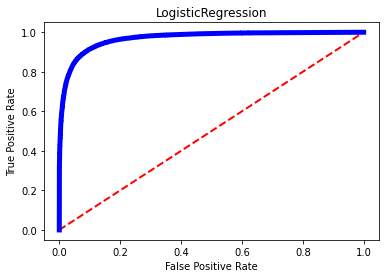

In [168]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fpr, tpr, color = 'b', lw = 5, label = 'ROC Curve')   # graph for AOC ROC curve
plt.xlabel('False Positive Rate')  # x axis
plt.ylabel('True Positive Rate')   # y axis
plt.title('LogisticRegression')  # Title
# This diagram is for GradientBoostingClassifier
plt.show()

In [169]:
# As our model is giving accuracy of 90.56 % , therefore, curve is not proper sharp

In [170]:
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
auc_score

0.9077199858842878

### Deploy Model

In [171]:
import pickle
filename = 'mcd_model.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))         # operation to deploy model

### Loading model

In [172]:
load_model =  pickle.load(open('mcd_model.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result) 


0.9077131356817707


### Conclusion

In [173]:
original = np.array(y_test)
predicted = np.array(load_model.predict(x_test))  
# convert columns in to np.array 

In [174]:
print(predicted.shape)
print(original.shape)
print(x_test.shape)
print(y_test.shape)


(110059,)
(110059,)
(110059, 63)
(110059,)


In [175]:
conclusion = pd.DataFrame({'Original fraud_reported': original, 'Predicted fraud_reported': predicted}, index = range(len(original)))
# Dataframe creation

In [176]:
pd.set_option('display.max_rows', None)  # To maximize the rows
conclusion.head()

,Original fraud_reported,Predicted fraud_reported
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1


In [177]:
conclusion.sample(10)

,Original fraud_reported,Predicted fraud_reported
109134,0,0
8189,1,1
91611,1,1
50954,0,0
96633,1,1
17250,1,1
91788,1,1
4980,0,0
18754,0,0
23627,0,0


In [178]:
conclusion.tail(10)

,Original fraud_reported,Predicted fraud_reported
110049,1,1
110050,1,1
110051,0,0
110052,0,0
110053,1,1
110054,0,0
110055,1,1
110056,0,0
110057,1,0
110058,1,1
